<a href="https://colab.research.google.com/github/oliviazha/personality-ml/blob/main/CIS_545_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction

What are the differences between males and females, if any? Between teenagers and adults and people of different nationalities? These questions are often thorny in discussion, but studying personalities in the context of biological and cultural pressures can be relevant to consumer marketing and understanding underrepresented demographics. 

Previous research has indicated that females tend to score higher on Agreeableness and Neuroticism while males tend to score higher on Openness among other differences. This leads us to wonder... since scientific research seems to point to reproducable gender differences, can we build machine learning models to accurately predict someone's gender based on their personality? Moreover, would there also be significant trends among personalities in people of different ages and nationalities? 


In this notebook, we use data collected from Cattell's 16 Personality Factors Test to examine whether trends exist between how people answer personality questions and characteristics such as gender, age, and where they are from. We use linear and logistic regression as well as random forest for our machine learning models.


##Data Source

Our data comes from [Kaggle](https://www.kaggle.com/tunguz/cattells-16-personality-factors) and consists of 50,000 personality data surveys from respondents around the world.

We used the csv file of respondent answers to create our main dataframe, and referenced the html file to understand the questions that make up Cattell's test.

For further background on [Cattell's 16 Personality Factors Test](https://openpsychometrics.org/tests/16PF.php):

The results of Cattell's personality test consists of a scoring from 0 to 4 for each of the 16 traits including Warmth, Emotional Stability, Tension, etc. These scores are determined based on an individual's responses to over 160 questions.

An outline of the data collected is below:

**Columns**

1. Questions (int): on a scale of 1-5 how strongly do you agree with the statement?

2. Country (string): country of origin of test-takerage

3. Gender (int): gender of test-taker (0: missed, 1: male, 2: female, 3: other)

4. Age (int): age of test-taker (must be greater than 13)

5. Accuracy (int): scale from 0 - 100 that test-taker feel confident in their response

6. Source (int): HTTP referrers (1: site website, 2: google, 3: facebook, 4: .edu site, 5: wikipedia, 6: other or no sites)

7. Elapsed (int): seconds passed for test-taker to finish test

The 16 traits measured:


- A. Warmth (Outgoing vs Reserved)
- B. Reasoning / Problem-Solving (Abstract vs Concrete)
- C. Emotional Stability (Calm vs High-strung)
- D. Dominance (Forceful vs Submissive)
- E. Liveliness (Spontaneous vs Restrained)
- F. Rule-Consciousness (Conforming vs Non-conforming)
- G. Social Boldness (Uninhibited vs Shy)
- H. Sensitivity (Tender-hearted vs Tough-minded)
- I. Vigilance (Suspicious vs Trusting)
- J. Abstractedness (Imaginative vs Practical)
- K. Privateness (Discreet vs Open)
- L. Apprehension (Worried vs Confident)
- M. Openess to Change (Flexible vs Traditional)
- N. Self-Reliance (Self-sufficient vs Group-oriented)
- O. Perfectionism (Controlled vs Unexacting)
- P. Tension (Tense vs Relaxed)

# Loading Packages & Data


**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import time
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
!pip install kneed

# Preprocessing

**Loading in Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load in table and show shape
personality_df = pd.read_csv('/content/drive/MyDrive/CIS545 Final Project/data.csv')
print(personality_df)
print(personality_df.shape)

      A1\t"A2"\t"A3"\t"A4"\t"A5"\t"A6"\t"A7"\t"A8"\t"A9"\t"A10"\t"B1"\t"B2"\t"B3"\t"B4"\t"B5"\t"B6"\t"B7"\t"B8"\t"B9"\t"B10"\t"B11"\t"B12"\t"B13"\t"C1"\t"C2"\t"C3"\t"C4"\t"C5"\t"C6"\t"C7"\t"C8"\t"C9"\t"C10"\t"D1"\t"D2"\t"D3"\t"D4"\t"D5"\t"D6"\t"D7"\t"D8"\t"D9"\t"D10"\t"E1"\t"E2"\t"E3"\t"E4"\t"E5"\t"E6"\t"E7"\t"E8"\t"E9"\t"E10"\t"F1"\t"F2"\t"F3"\t"F4"\t"F5"\t"F6"\t"F7"\t"F8"\t"F9"\t"F10"\t"G1"\t"G2"\t"G3"\t"G4"\t"G5"\t"G6"\t"G7"\t"G8"\t"G9"\t"G10"\t"H1"\t"H2"\t"H3"\t"H4"\t"H5"\t"H6"\t"H7"\t"H8"\t"H9"\t"H10"\t"I1"\t"I2"\t"I3"\t"I4"\t"I5"\t"I6"\t"I7"\t"I8"\t"I9"\t"I10"\t"J1"\t"J2"\t"J3"\t"J4"\t"J5"\t"J6"\t"J7"\t"J8"\t"J9"\t"J10"\t"K1"\t"K2"\t"K3"\t"K4"\t"K5"\t"K6"\t"K7"\t"K8"\t"K9"\t"K10"\t"L1"\t"L2"\t"L3"\t"L4"\t"L5"\t"L6"\t"L7"\t"L8"\t"L9"\t"L10"\t"M1"\t"M2"\t"M3"\t"M4"\t"M5"\t"M6"\t"M7"\t"M8"\t"M9"\t"M10"\t"N1"\t"N2"\t"N3"\t"N4"\t"N5"\t"N6"\t"N7"\t"N8"\t"N9"\t"N10"\t"O1"\t"O2"\t"O3"\t"O4"\t"O5"\t"O6"\t"O7"\t"O8"\t"O9"\t"O10"\t"P1"\t"P2"\t"P3"\t"P4"\t"P5"\t"P6"\t"P7"\t"P8"\t"P9"\t"P10"\

In [ ]:
# use a delimiter of "\t" to split single column into multiple columns
personality_df_split = pd.read_csv('/content/drive/MyDrive/CIS545 Final Project/data.csv', delimiter="\t")
print(personality_df_split)
print(personality_df_split.shape)

       A1  A2  A3  A4  A5  A6  ...  age  gender  accuracy  country  source  elapsed
0       1   4   2   3   3   2  ...   17       1        92       US       6      914
1       4   3   4   3   4   4  ...   37       1       100       US       1      891
2       3   4   4   4   4   4  ...   31       1        80       US       6      903
3       4   5   4   4   4   3  ...   32       1        93       US       1      806
4       4   0   4   4   4   3  ...   46       2        87       NZ       1     1826
...    ..  ..  ..  ..  ..  ..  ...  ...     ...       ...      ...     ...      ...
49154   1   1   1   1   1   1  ...   24       1       100       IN       1      274
49155   4   5   4   4   4   3  ...   22       1        50       ZA       1      584
49156   2   4   2   3   3   3  ...   29       2        85       BE       6      932
49157   4   4   4   4   4   4  ...   48       1        95       CZ       2     1212
49158   4   5   4   5   5   4  ...   18       2        99       GB       2  

In [ ]:
# identify columns of table
personality_columns = personality_df_split.columns
print(personality_columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       ...
       'P7', 'P8', 'P9', 'P10', 'age', 'gender', 'accuracy', 'country',
       'source', 'elapsed'],
      dtype='object', length=169)


In [ ]:
# create index for testtakers
personality_df_split['id'] = personality_df_split.index
personality_df_split.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,...,M8,M9,M10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed,id
0,1,4,2,3,3,2,3,4,4,3,4,4,5,4,5,4,5,4,1,2,1,1,1,4,5,4,4,2,4,4,3,3,2,4,3,5,5,4,4,3,...,1,3,3,4,4,4,4,4,5,5,4,4,3,4,2,3,4,3,2,2,4,4,4,5,5,5,4,4,5,1,2,5,2,17,1,92,US,6,914,0
1,4,3,4,3,4,4,4,4,2,2,4,4,4,4,5,4,3,2,3,2,4,1,1,1,2,3,3,2,5,4,4,3,3,4,2,4,4,4,5,4,...,1,2,2,4,2,4,5,5,5,5,2,4,1,3,2,4,2,3,2,2,3,4,4,4,4,4,2,3,2,3,2,2,2,37,1,100,US,1,891,1
2,3,4,4,4,4,4,4,3,2,2,4,4,5,5,4,4,4,4,2,2,2,2,2,2,4,4,3,3,3,4,2,3,0,3,3,2,2,3,4,3,...,2,1,2,4,4,5,4,4,5,4,3,4,1,3,2,3,3,3,2,3,4,3,3,3,3,4,2,4,2,2,3,3,3,31,1,80,US,6,903,2
3,4,5,4,4,4,3,3,2,2,2,4,2,4,5,4,5,4,4,3,3,3,2,4,3,2,3,4,3,3,2,2,3,4,3,2,3,4,2,3,3,...,2,2,2,4,5,5,5,5,5,5,1,3,3,2,2,2,2,3,4,5,4,5,4,4,2,2,2,3,4,2,3,4,4,32,1,93,US,1,806,3
4,4,0,4,4,4,3,5,1,2,4,2,4,4,5,5,4,4,5,4,1,5,1,2,2,4,3,3,4,4,4,4,3,2,5,4,3,4,5,4,1,...,2,1,2,3,3,4,4,5,4,5,4,4,2,3,3,5,3,4,2,1,2,1,4,4,3,4,3,4,3,4,2,3,2,46,2,87,NZ,1,1826,4


#Feature Engineering

The data we are using contains individual responses to each of the questions in the test, but not the actual test results with the 0-4 scoring of 16 traits. However, we are interested in building and evaluating our models from personality characteristics, and not individual question responses. 

With this goal in mind, we used the list of questions provided in our dataset to extract out a scoring for each of the 16 personality traits for each respondent. More specifically, we classified the questions by the trait they were used to score (given in our dataset) and for each respondent, we calculated a percentage for each trait based on their responses to the relevant questions. 



First, we identified questions whose respondent scoring needed to be inverted for our score calculation. For example, if a respondent chose "5" (strongly agree) for a question testing "Warmth" that asked "I am not really interested in others", we would need to flip the score to be "1" (strongly disagree) to accurately factor this answer into a percentage for how "warm" this respondent is.

In [ ]:
a_col = ['A8', 'A9', 'A10'] #Warmth 1 (reserved) - 5 (outgoing), reserved values inverted
b_col = ['B9', 'B10', 'B11', 'B12', 'B13'] # Reasoning 1 (abstract) - 5 (concrete), abstract values inverted
c_col = ['C6', 'C7', 'C8', 'C9', 'C10'] # Emotional Stability 1 (high-strung) - 5 (calm), high-strung values inverted
d_col = ['D7', 'D8', 'D9', 'D10'] #Dominance 1 (submissive) - 5 (forceful), submissive values inverted
e_col = ['E7', 'E8', 'E9', 'E10'] #Liveliness 1 (restrained) - 5 (spontaneous), restrained values inverted
f_col = ['F5', 'F6', 'F7', 'F8', 'F9', 'F10'] #Rule-consciousness 1 (noncomforming) - 5 (conforming), nonconforming values inverted
g_col = ['G6','G7','G8','G9','G10'] #Social boldness 1 (shy) - 5 (uninhibited), shy values inverted
h_col = ['H7','H8','H9','H10'] #Sensitivity 1 (tough-minded) - 5 (tender-hearted), insensitive values inverted
i_col = ['I7','I8','I9','I10'] #Vigilance 1 (trusting) - 5 (suspicious), trusting values inverted
j_col = ['J8','J9','J10'] #Abstract 1 (practical) - 5 (imaginative), grounded values inverted
k_col = ['K6','K7','K8','K9','K10'] #Privateness 1 (open) - 5 (discreet), open values inverted
l_col = ['L8','L9','L10'] #Apprehensive 1 (confident) - 5 (worried), values inverted
m_col = ['M7','M8','M9','M10'] #Openness to Change 1 (traditional) - 5 (flexible), traditional values inverted
n_col = ['N8','N9','N10'] #Self-reliance 1  (group-oriented) - 5 (self-sufficient), group-oriented values inverted
o_col = ['O6','O7','O8','O9','O10'] #Perfectionism 1 (unexacting) - 5 (controlled), unexacting values inverted
p_col = ['P8','P9', 'P10'] #Tension 1 (relaxed) - 5 (tense), relaxed values inverted
personality_list = [['A', 'Score_A_Warmth', a_col], ['B', 'Score_B_Reasoning', b_col], ['C', 'Score_C_EmoStability', c_col],
                    ['D', 'Score_D_Dominance', d_col], ['E', 'Score_E_Liveliness', e_col], ['F', 'Score_F_Conforming', f_col], 
                    ['G', 'Score_G_SocialBoldness', g_col], ['H', 'Score_H_Sensitivity', h_col], ['I', 'Score_I_Vigilance', i_col],
                    ['J', 'Score_J_Abstractness', j_col], ['K', 'Score_K_Privateness', k_col], ['L', 'Score_L_Apprehension', l_col], 
                    ['M', 'Score_M_OpenToChange', m_col], ['N', 'Score_N_SelfReliance', n_col], ['O', 'Score_O_Perfectionism', o_col],
                    ['P', 'Score_P_Tension', p_col]]

One thing we noted was that the html file from our dataset which listed all the questions was actually missing one question (P10) which was present in the csv with respondent answers. After taking the test ourselves, we identified this missing question and factored it into our scoring accordingly

The function below is applied over all 16 traits.  For each personality value (e.g.: "A - Warm"), it aggregates the individual's score for that personality, while inverting any necessary questions.  Note that questions that were unanswered were given a score of 0 and removed from the aggregation.  Afterwards, each personality score was calculated by dividing the sum of the aggregation by the sum of possible score (excuding unanswered questions).

For example, an individual with score {"A1:" 5, "A2": 4, "A3:" 3, "A4:" 2, "A5:" 1, "A6": 0}, where "A5" is an inverted column, would have an aggregate sume of 5 (A1) + 4 (A2) + 3 (A3) + 2 (A4) + 4 (A5, inverted) = 18, a possible score of 5 * 5 = 25(5 possible points for questions A1 - A5 each since A6 is excluded), and a total score of 18 / 25 = .72

In [ ]:
def aggregate_personality(letter, personality, flip_index):
  # get names of all columns starting with letter then extract column
  letter_cols = [col for col in personality_columns if col.startswith(letter)]
  letter_df = personality_df_split[letter_cols]

  # set all missing answers to null
  letter_df.replace(0, np.NaN, inplace=True)
  
  # invert values for flipped columns 
  inverted_df = letter_df[flip_index].subtract(5).multiply(-1)
  for index in flip_index:
    letter_df[index] = inverted_df[index]

  
  # sum across row all legit values
  row_sum_series = letter_df.sum(axis=1, skipna=True)
  # count number of null values across each row
  row_null_count_series = letter_df.isnull().sum(axis=1)
  # calculate the max score possible for each row
  max_score = len(letter_cols) * 5
  row_max_attainable_series = row_null_count_series.apply(lambda x: max_score - 5 * x)
  row_score_series = (row_sum_series / row_max_attainable_series).round(4)
 
  # set
  personality_df_split.drop(letter_cols, axis=1, inplace=True)
  personality_df_split[personality] = row_score_series


In [ ]:
# iterate over personality list and compute score
for personality_filter in personality_list:
  aggregate_personality(personality_filter[0], personality_filter[1], personality_filter[2])

personality_df_split.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,gender,accuracy,country,source,elapsed,id,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension
0,17,1,92,US,6,914,0,0.4400,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70
1,37,1,100,US,1,891,1,0.6600,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62
2,31,1,80,US,6,903,2,0.7000,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52
3,32,1,93,US,1,806,3,0.7200,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46
4,46,2,87,NZ,1,1826,4,0.7111,0.6923,0.4800,0.78,0.36,0.56,0.64,0.60,0.54,0.48,0.58,0.68,0.66,0.66,0.66,0.66



Now that we have extracted the actual traits for each respondent, we can do some exploratory data analysis and start building our models.

One caveat of our approach is that upon verifying with the official Cattell test, our calculated scores are slightly off from actual test results when equally scaled (less than 5% off on the 0-4 scaling). Since we also did not find Cattell's scoring procedure, we continued with our scoring.

# Exploratory Data Analysis

To better understand the rest of our data, we did some exploratory data analysis to look more closely at the 5 other features collected: the time elapsed, country of location, gender, age, self-rated accuracy, and source of the data. But first, we looked at a correlation matrix to check how correlated our features are.

Based off a quick preview of the correlation matrix, there appears to be close to no correlation between non-personality factors (age, gender, accuracy, source, elapsed) compared with personality traits.  For accuracy, source, and elapsed, that is as expected, as these traits are meta-variables regarding the test procedures, rather than the test-taker themself.

For age, each correlation has a value of less than .1, suggesting that personality and age are not greatly correlated.  This suggests that personality within individuals remain static over their lifetime, and so no specific personality traits are higher within certain age groups (e.g.: children do not tend to have higher liveliness scores than become less lively in adulthood).  

For gender, while the correlations are still low, the values are significantly higher than the age correlations.  For example, the highest gender correlation - Sensitivity (.34) is almost 50 times greater than the highest age correlation - Tension (.0065).  This suggests that there may be a slight imbalance between personality traits and gender groups, with certain gender groups having a higher proportion of individuals who score higher in the reasoning, emotional stability, sensitivity, and apprehension rates.

Finally, for correlations between personality factors, there appears to be great variety in the correlation values.  Some traits appear to be strongly directly correlated, such as social boldness and liveliness (.63) and vigilance and tension (.54), some appear to be strongy negatively correlated, such as emotional stability and apprehension (-.74) and social boldness and privateness (-.64), while most have low correlations. Such distributions make sense, as most traits are likely independent of one another, while a few certain factors may influence multiple traits. For example, socially extroverted individuals are likely to score high on social boldness and liveliness while socially introverted individuals are likely to score low on social boldness and high on privateness.  Interestingly, though privateness and liveliness both strongly correlate with social boldness, they do not strongly correlate with one another, having only a correlation score of -.41.

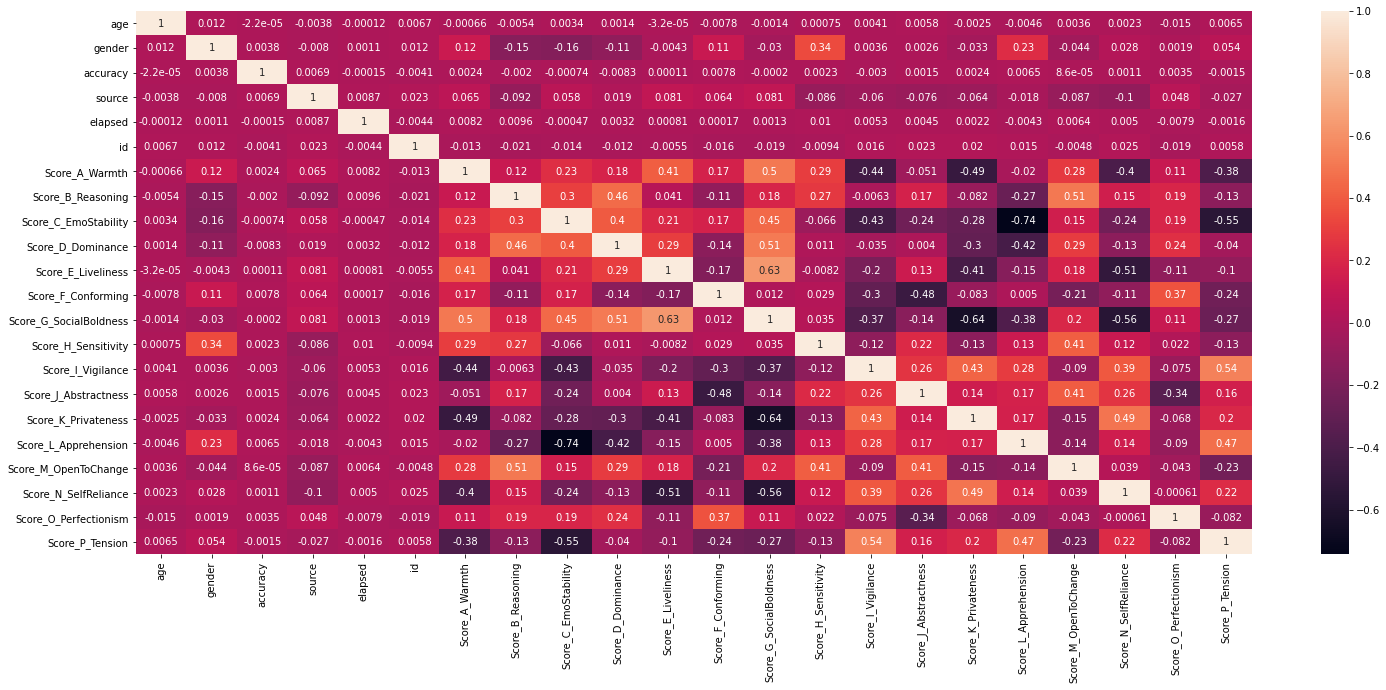

In [ ]:
corr_matrix = personality_df_split.corr()

plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#general function to create bar graph
def create_bar_category(x, y, x_label, y_label, title, figsize):
  plt.figure(figsize=figsize)
  plt.bar(np.arange(len(x)), y, align='center', alpha=0.5)
  plt.xticks(np.arange(len(x)), x)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.title(title)
  plt.show()

In [ ]:
# general function to create pie chart
def create_pie_chart(labels, sizes, explode, title):
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(title)
  plt.show()

## 1. Elapse

*personality_df*: time elapsed for test-taker to finish quiz

Possible Values: 0 and above

First, we did a sanity check to make sure that there are no negative values for elapsed time. Then, we convert seconds to minutes for a better sense of the time it took to complete the quiz. Then we filtered out data where time elapsed fell under 10 minutes and over 24 hours, to ensure the legitimacy of the data collected, assumming that it would require greater than 10 minutes to thoughtfully answer the quiz questions. Following that, we calculated the mean, median, and standard deviation of the time elapsed.

In [ ]:
# convert to minutes and filter out less than 10 minutes or greater than 24 hours
elapsed_df = personality_df_split[['elapsed','gender']]
elapsed_df = elapsed_df[elapsed_df['elapsed']>0]
elapsed_df['elapsed'] = elapsed_df['elapsed'].map(lambda x: x/60)
elapsed_df = elapsed_df[elapsed_df['elapsed']>10]
elapsed_df = elapsed_df[elapsed_df['elapsed']<1440]

# calculate mean, median, and std
print('Standard deviation: ', elapsed_df['elapsed'].std()) 
print('Mean: ', elapsed_df['elapsed'].mean())
print('Median: ', elapsed_df['elapsed'].median())

# check that filtering was properly done
print(elapsed_df.sort_values(by='elapsed'))

Standard deviation:  80.83172824919714
Mean:  27.46713131142467
Median:  14.65
           elapsed  gender
13259    10.016667       2
9601     10.016667       2
8599     10.016667       2
19892    10.016667       1
44753    10.016667       2
...            ...     ...
42838  1423.716667       2
19723  1429.700000       1
16223  1430.116667       1
27031  1432.500000       1
4068   1438.016667       1

[35511 rows x 2 columns]


Convert the actual dataframe from seconds to minutes:

In [ ]:
personality_df_split['elapsed'] = personality_df_split['elapsed'].map(lambda x: x/60)
personality_df_split.head()

,age,gender,accuracy,country,source,elapsed,id,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension
0,17,1,92,US,6,15.233333,0,0.4400,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70
1,37,1,100,US,1,14.850000,1,0.6600,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62
2,31,1,80,US,6,15.050000,2,0.7000,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52
3,32,1,93,US,1,13.433333,3,0.7200,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46
4,46,2,87,NZ,1,30.433333,4,0.7111,0.6923,0.4800,0.78,0.36,0.56,0.64,0.60,0.54,0.48,0.58,0.68,0.66,0.66,0.66,0.66


To produce a graph that is more easily interpretable, we grouped the time elapsed into 4 categories, less than 1 hour, between 1-4 hours, between 4-12 hours, and between 12-24 hours, to see the distributions.

In [ ]:
# function to create columns with elapse category 
def elapsed_category (time):
  if time < 60:
    return 'Less than 1 Hour'
  elif time > 60 and time < 240:
    return 'Between 1-4 Hours'
  elif time > 240 and time < 720:
    return 'Between 4-12 Hours'
  else: return 'Between 12-24 Hours'

In [ ]:
# categorize
elapsed_df['elapse category'] = elapsed_df['elapsed'].apply(lambda x: elapsed_category(x))
elapsed_grouped = elapsed_df.groupby('elapse category').count().rename(columns={"gender": "count"})
elapsed_grouped.reset_index(inplace=True)
elapsed_grouped = elapsed_grouped[['elapse category', 'count']]
elapsed_grouped

,elapse category,count
0,Between 1-4 Hours,1140
1,Between 12-24 Hours,138
2,Between 4-12 Hours,265
3,Less than 1 Hour,33968


Then we plot the distribution of the time elapsed in categories when taking the quiz.

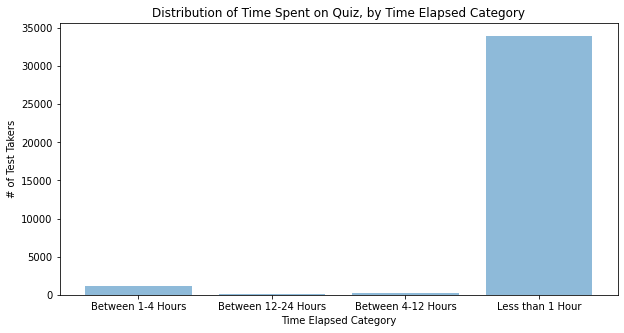

In [ ]:
# plot
create_bar_category(elapsed_grouped['elapse category'], elapsed_grouped['count'], 'Time Elapsed Category', '# of Test Takers', 'Distribution of Time Spent on Quiz, by Time Elapsed Category', (10,5))

We see that elapsed times are anywhere between .08 - 142243 minutes. For the sake of filtering out inaccurate data, we decided to only use the data of respondents that spent between 10 minutes - 24 hours. This range was chosen based on an estimate for a reasonable amount of time it would take the average person to honestly answer 160+ questions, with an extended upper range to account for any respondents who take the test in more than one sitting but within one day. Here we do the filtering on the actual dataframe:

In [ ]:
personality_df_split = personality_df_split[personality_df_split['elapsed']>10]
personality_df_split = personality_df_split[personality_df_split['elapsed']<1440]

In [ ]:
personality_df_split.shape

(35511, 23)

## 2. Countries

*personality_df*: ISO-alpha2 code of test-taker's country of origin.

*unsd_df*: official classification of countries and area from the UN Department of Economic and Social Affairs to categorize countries into region, sub-region, and other characterizations.  Additionally, the dataset includes the ISO-alpha2 code for each country and area.  The dataset comes come from the United Nations Statistical Division (UNSD).

*join*: joins between *personality_df* and *unsd_df* will be based on the ISO-alpha2 column, called "country" and "ISO-alpha2 Code" respectively.


In [ ]:
unsd_df = pd.read_csv('/content/drive/MyDrive/CIS545 Final Project/unsd.csv', error_bad_lines=False)

# move the country or area column to the front
country_or_area_col = unsd_df['Country or Area']
unsd_df.drop(labels=['Country or Area'], axis=1,inplace = True)
unsd_df.insert(0, 'Country or Area', country_or_area_col)

print(unsd_df.columns)
unsd_df.head()

Index(['Country or Area', 'Global Code', 'Global Name', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name',
       'Intermediate Region Code', 'Intermediate Region Name', 'M49 Code',
       'ISO-alpha2 Code', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
       'Land Locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'Developed / Developing Countries'],
      dtype='object')


b'Skipping line 67: expected 16 fields, saw 17\nSkipping line 126: expected 16 fields, saw 17\nSkipping line 127: expected 16 fields, saw 17\n'


,Country or Area,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,Algeria,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,12,DZ,DZA,NaN,NaN,NaN,Developing
1,Egypt,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,818,EG,EGY,NaN,NaN,NaN,Developing
2,Libya,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,434,LY,LBY,NaN,NaN,NaN,Developing
3,Morocco,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,504,MA,MAR,NaN,NaN,NaN,Developing
4,Sudan,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,729,SD,SDN,x,NaN,NaN,Developing


In [ ]:
# drop all the unnecessary columns
unsd_cols = unsd_df.columns
unsd_keep_cols = ['Country or Area', 'Region Name', 'Sub-region Name',  'ISO-alpha2 Code', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)', 'Land Locked Developing Countries (LLDC)',
              'Small Island Developing States (SIDS)', 'Developed / Developing Countries']
unsd_drop_cols = [i for i in unsd_cols if i not in unsd_keep_cols ]
unsd_dropped_df = unsd_df.drop(unsd_drop_cols, axis=1)
unsd_dropped_df.head()

,Country or Area,Region Name,Sub-region Name,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,Algeria,Africa,Northern Africa,DZ,DZA,NaN,NaN,NaN,Developing
1,Egypt,Africa,Northern Africa,EG,EGY,NaN,NaN,NaN,Developing
2,Libya,Africa,Northern Africa,LY,LBY,NaN,NaN,NaN,Developing
3,Morocco,Africa,Northern Africa,MA,MAR,NaN,NaN,NaN,Developing
4,Sudan,Africa,Northern Africa,SD,SDN,x,NaN,NaN,Developing


In [ ]:
# extract just the countries of personality_df as dataframe, then join with countries
test_countries = personality_df_split[['country']]
join_countries = test_countries.merge(unsd_dropped_df, left_on='country', right_on='ISO-alpha2 Code')
join_countries.head()

,country,Country or Area,Region Name,Sub-region Name,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,US,United States of America,Americas,Northern America,US,USA,NaN,NaN,NaN,Developed
1,US,United States of America,Americas,Northern America,US,USA,NaN,NaN,NaN,Developed
2,US,United States of America,Americas,Northern America,US,USA,NaN,NaN,NaN,Developed
3,US,United States of America,Americas,Northern America,US,USA,NaN,NaN,NaN,Developed
4,US,United States of America,Americas,Northern America,US,USA,NaN,NaN,NaN,Developed


In [ ]:
# groupby country of origin and keep only the ISO-alpha3 code column
basic_vis_groupby_country = join_countries[['country', 'ISO-alpha3 Code']].groupby(by=['ISO-alpha3 Code']).count().rename(columns={"country": "count"})
basic_vis_groupby_country.reset_index(inplace=True)
basic_vis_groupby_country = basic_vis_groupby_country.merge(unsd_dropped_df[['ISO-alpha3 Code', 'Country or Area']])
basic_vis_groupby_country.head()

,ISO-alpha3 Code,count,Country or Area
0,AFG,3,Afghanistan
1,ALB,15,Albania
2,AND,1,Andorra
3,ARE,183,United Arab Emirates
4,ARG,56,Argentina


A choropleth was created to visualize the distribution of test takers seperated by countries.  From the choropleth, it is clear that the test-takers are not balanced geographically.  For example, the United States accounts for ~16.5k of the ~35 total results, while China, the world's largest country, only accounts for ~100.  When performing future classifications, random sampling techniques (over or under) are sure to be necessary to ensure class balance.

In [ ]:
fig_country = px.choropleth(basic_vis_groupby_country, locations="ISO-alpha3 Code",
                    color="count",
                    hover_name="Country or Area", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    height=500)
fig_country.show()

A grouping of test-takers by regions also demonstrate a geographical imbalance in test taker's country of origin.  More test-takers come from the Americas than all other regions combined.  This suggests that when conducting machine learning models based on region of origin, sampling balancing techniques will also need to be employed.

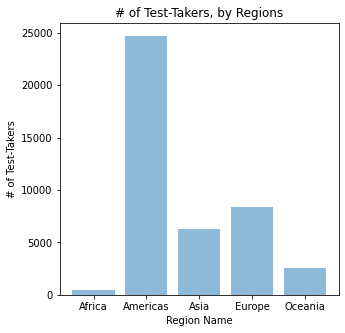

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



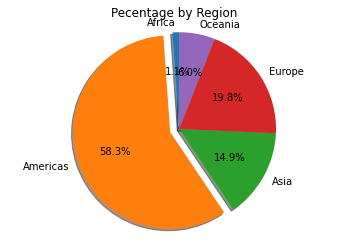

,Region Name,count
0,Africa,472
1,Americas,24695
2,Asia,6301
3,Europe,8366
4,Oceania,2522


In [ ]:
# groupby and visualize by regions
basic_vis_groupby_region = join_countries[['country', 'Region Name']].groupby(by=['Region Name']).count().rename(columns={"country": "count"})
basic_vis_groupby_region.reset_index(inplace=True)
create_bar_category(basic_vis_groupby_region['Region Name'], basic_vis_groupby_region['count'], 'Region Name', '# of Test-Takers', '# of Test-Takers, by Regions', (5,5))

# pie chart
labels = 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'
sizes = basic_vis_groupby_region[['count']]
explode = (0, 0.1, 0, 0, 0) # only "explode" the 2nd slice (i.e. 'Americas')
create_pie_chart(labels, sizes, explode, 'Pecentage by Region')

basic_vis_groupby_region

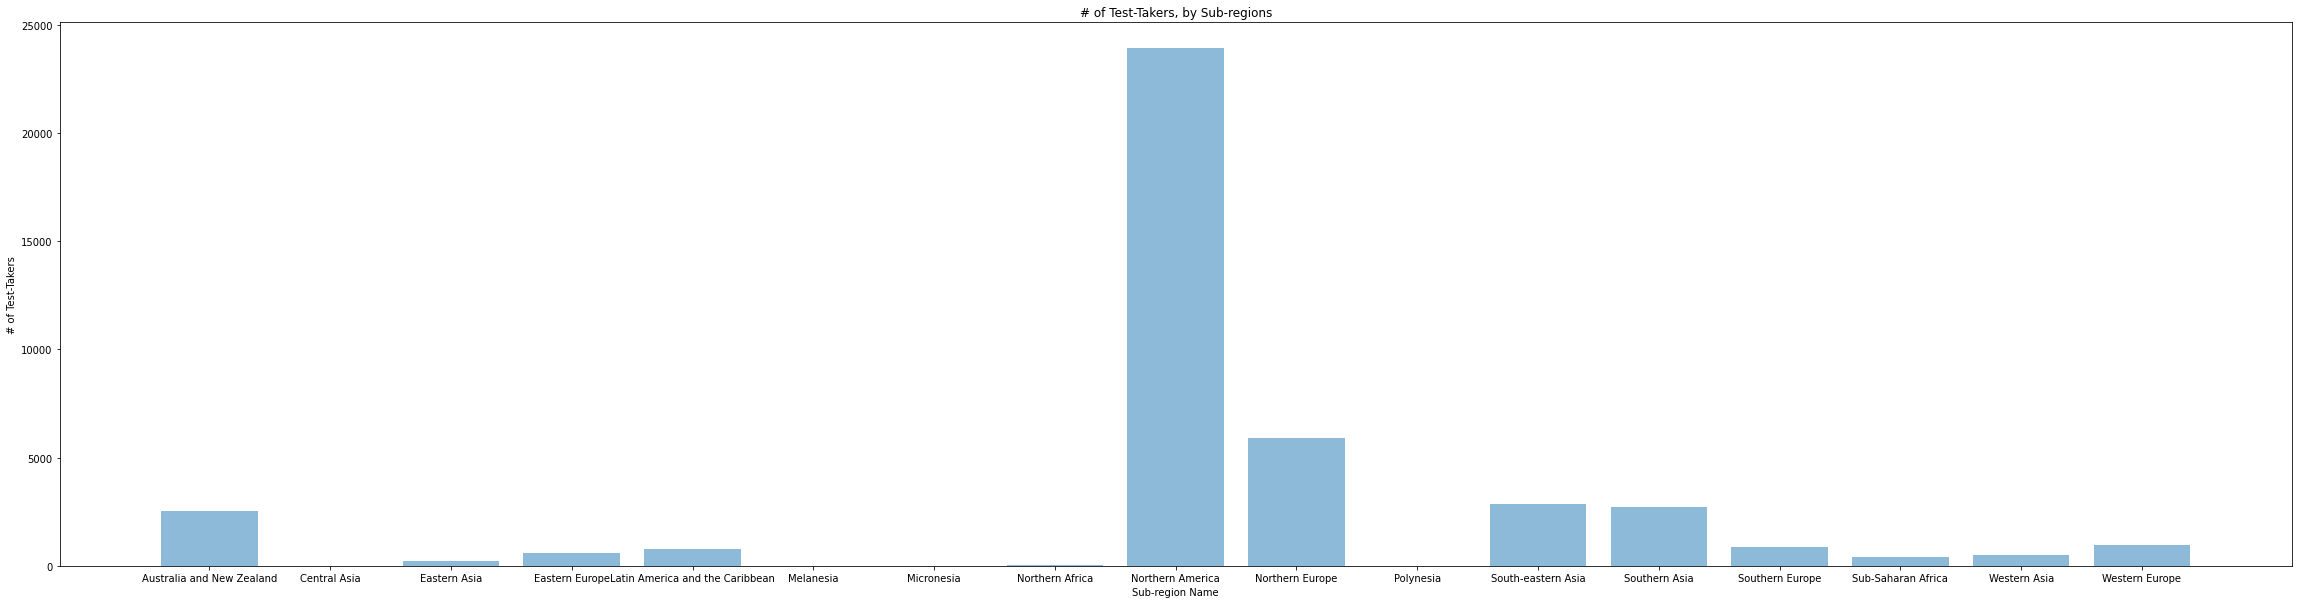

,Sub-region Name,count
0,Australia and New Zealand,2518
1,Central Asia,5
2,Eastern Asia,210
3,Eastern Europe,596
4,Latin America and the Caribbean,766
5,Melanesia,1
6,Micronesia,2
7,Northern Africa,49
8,Northern America,23929
9,Northern Europe,5920


In [ ]:
# grouping by subregion
basic_vis_groupby_subregion = join_countries[['country', 'Sub-region Name']].groupby(by=['Sub-region Name']).count().rename(columns={"country": "count"})
basic_vis_groupby_subregion.reset_index(inplace=True)
create_bar_category(basic_vis_groupby_subregion['Sub-region Name'], basic_vis_groupby_subregion['count'], 'Sub-region Name', '# of Test-Takers', '# of Test-Takers, by Sub-regions', (40,10))
basic_vis_groupby_subregion

Next, we look at the amount of representation from developing countries vs developed countries.  Similar to regions, grouping test-takers based on development levels also yields an imbalance in class sampling.  Thus, future machine learning models including the development attribute will also need to employ sampling balancing techniques.

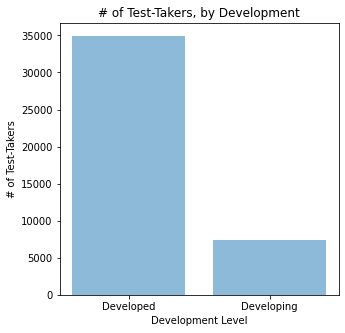

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



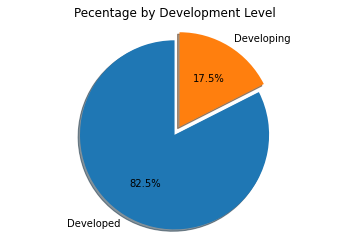

,Developed / Developing Countries,count
0,Developed,34931
1,Developing,7425


In [ ]:
basic_vis_groupby_development = join_countries[['country', 'Developed / Developing Countries']].groupby(by=['Developed / Developing Countries']).count().rename(columns={"country": "count"})
basic_vis_groupby_development.reset_index(inplace=True)

# bar graph
create_bar_category(basic_vis_groupby_development['Developed / Developing Countries'], basic_vis_groupby_development['count'], 'Development Level', '# of Test-Takers', '# of Test-Takers, by Development', (5,5))

# pie chart
labels = 'Developed', 'Developing'
sizes = basic_vis_groupby_development[['count']]
explode = (0.1, 0) # only "explode" the 1st slice (i.e. 'Developed')
create_pie_chart(labels, sizes, explode, 'Pecentage by Development Level')

basic_vis_groupby_development

## 3. Gender

*personality_df*: identified gender of test-taker

Possible Values:
  - 0: missed
  - 1: male
  - 2: female
  - 3: other

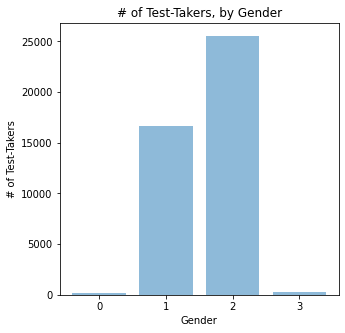

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



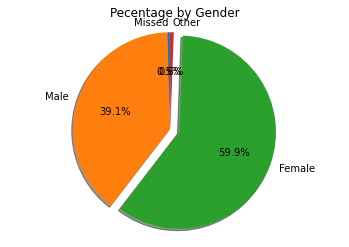

,gender,count
0,0,205
1,1,16671
2,2,25542
3,3,248


In [ ]:
# extract just the gender of personality_df as dataframe
gender_df = personality_df_split[['gender', 'age']]
gender_grouped = gender_df.groupby('gender').count().rename(columns={"age": "count"})
gender_grouped.reset_index(inplace=True)

# bar graph
create_bar_category(gender_grouped['gender'], gender_grouped['count'], 'Gender', '# of Test-Takers', '# of Test-Takers, by Gender', (5,5))

# pie chart
labels = 'Missed', 'Male', 'Female', 'Other'
sizes = gender_grouped[['count']]
explode = (0, 0, 0.1, 0)  # only "explode" the 3nd slice (i.e. 'Female')
create_pie_chart(labels, sizes, explode, 'Pecentage by Gender')

gender_grouped

We found that over half of the test takers identify as female, more specifically 59.79% with 39.1% identifying as male. As a result of the evident majority, we decided to not include the other and missed categories when performing our logistic regression in the later section. 

## 4. Age

*personality_df*: identified age of test-taker

Possible Values: 13 and above

In [ ]:
# extract just the age of personality_df as dataframe
ages_df = personality_df_split[['age','gender']]
ages_grouped = ages_df.groupby('age').count().rename(columns={"gender": "count"})
ages_grouped.reset_index(inplace=True)
ages_grouped

,age,count
0,13,197
1,14,541
2,15,1073
3,16,2671
4,17,4224
...,...,...
112,5998,1
113,9000,1
114,24100,1
115,35768,1


We see that some of the inputted ages are unreasonable, being far larger than a realistic age. For the sake of analysis, we drop the rows of test takers with ages above 100.

Moreover, rather than exact ages, we are more interested in general categorizations of age. Thus, we group the ages into the following categories:

* 13-19: teenager

* 20-35: young adult

* 36-55: middle age

* 56+: older adult

In [ ]:
# function to create column with age category 
def age_category (age):
  if age < 20:
    return 'Teenager'
  elif age > 19 and age < 36:
    return 'Young Adult'
  elif age > 35 and age < 56:
    return 'Middle Age'
  else: return 'Older Adult'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



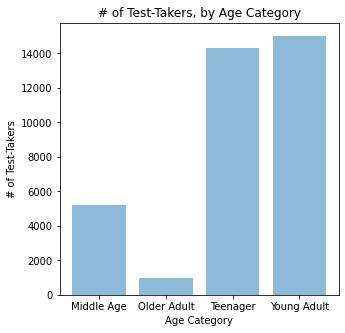

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



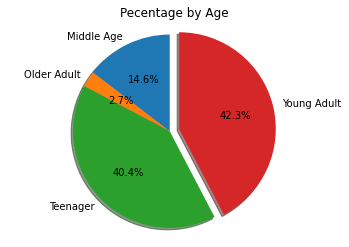

,age category,count
0,Middle Age,5180
1,Older Adult,946
2,Teenager,14327
3,Young Adult,15014


In [ ]:
# first dropping ages above 100
ages_grouped_filtered = ages_grouped[ages_grouped['age'] <= 100] 
# label ages with age category
ages_grouped_filtered['age category'] = ages_grouped_filtered['age'].apply(lambda x: age_category(x))
ages_grouped_filtered 
# group categories and sum counts of test takers in the age category
age_category_counts = ages_grouped_filtered.groupby('age category').sum()
age_category_counts.reset_index(inplace=True)
age_category_counts = age_category_counts[['age category', 'count']]
# plot
create_bar_category(age_category_counts['age category'], age_category_counts['count'], 'Age Category', '# of Test-Takers', '# of Test-Takers, by Age Category', (5,5))

# pie chart
labels = 'Middle Age', 'Older Adult', 'Teenager', 'Young Adult'
sizes = age_category_counts[['count']]
explode = (0, 0, 0, 0.1)  # only "explode" the 4th slice (i.e. 'Young Adult')
create_pie_chart(labels, sizes, explode, 'Pecentage by Age')

age_category_counts

We see that the majority of test takers in our data come from the young adult and teenage categories adding up to 82.7% in total.

Here we filter out ages greater than 100 on our original dataframe:

In [ ]:
personality_df_split = personality_df_split[personality_df_split['age']<=100]

In [ ]:
personality_df_split

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,...,M8,M9,M10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed,id
0,1,4,2,3,3,2,3,4,4,3,4,4,5,4,5,4,5,4,1,2,1,1,1,4,5,4,4,2,4,4,3,3,2,4,3,5,5,4,4,3,...,1,3,3,4,4,4,4,4,5,5,4,4,3,4,2,3,4,3,2,2,4,4,4,5,5,5,4,4,5,1,2,5,2,17,1,92,US,6,15.233333,0
1,4,3,4,3,4,4,4,4,2,2,4,4,4,4,5,4,3,2,3,2,4,1,1,1,2,3,3,2,5,4,4,3,3,4,2,4,4,4,5,4,...,1,2,2,4,2,4,5,5,5,5,2,4,1,3,2,4,2,3,2,2,3,4,4,4,4,4,2,3,2,3,2,2,2,37,1,100,US,1,14.850000,1
2,3,4,4,4,4,4,4,3,2,2,4,4,5,5,4,4,4,4,2,2,2,2,2,2,4,4,3,3,3,4,2,3,0,3,3,2,2,3,4,3,...,2,1,2,4,4,5,4,4,5,4,3,4,1,3,2,3,3,3,2,3,4,3,3,3,3,4,2,4,2,2,3,3,3,31,1,80,US,6,15.050000,2
3,4,5,4,4,4,3,3,2,2,2,4,2,4,5,4,5,4,4,3,3,3,2,4,3,2,3,4,3,3,2,2,3,4,3,2,3,4,2,3,3,...,2,2,2,4,5,5,5,5,5,5,1,3,3,2,2,2,2,3,4,5,4,5,4,4,2,2,2,3,4,2,3,4,4,32,1,93,US,1,13.433333,3
4,4,0,4,4,4,3,5,1,2,4,2,4,4,5,5,4,4,5,4,1,5,1,2,2,4,3,3,4,4,4,4,3,2,5,4,3,4,5,4,1,...,2,1,2,3,3,4,4,5,4,5,4,4,2,3,3,5,3,4,2,1,2,1,4,4,3,4,3,4,3,4,2,3,2,46,2,87,NZ,1,30.433333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49151,5,5,5,5,5,5,5,1,1,1,4,3,5,4,5,1,4,5,5,1,4,2,1,4,5,4,5,5,1,2,3,1,1,4,5,5,2,3,2,4,...,4,2,2,1,5,4,1,5,5,2,5,5,3,3,5,5,5,4,5,5,5,5,5,1,1,1,1,3,1,1,5,5,5,37,2,100,IN,2,24.866667,49151
49152,4,4,4,4,4,4,4,2,2,2,4,3,4,4,4,4,4,4,4,4,3,2,2,2,4,2,4,4,5,5,4,4,3,2,4,2,3,2,2,4,...,2,2,2,4,3,4,4,4,4,5,4,3,2,3,2,4,2,3,3,4,3,5,4,2,2,2,3,2,3,2,4,4,4,24,2,95,IN,2,11.750000,49152
49156,2,4,2,3,3,3,4,4,2,4,2,4,4,4,4,4,4,4,4,4,4,1,2,2,4,3,4,4,2,1,1,1,2,4,3,4,2,5,3,3,...,2,3,3,2,4,4,4,4,4,4,4,2,4,4,3,4,3,4,2,2,2,2,4,2,2,4,4,3,2,3,4,5,4,29,2,85,BE,6,15.533333,49156
49157,4,4,4,4,4,4,4,4,1,3,4,3,4,5,3,4,4,2,1,2,1,1,2,4,5,4,3,3,2,2,1,1,1,4,3,5,4,5,3,1,...,3,1,1,2,4,3,4,2,3,3,3,3,1,1,3,1,2,4,4,4,5,3,2,2,2,3,3,4,2,2,4,5,4,48,1,95,CZ,2,20.200000,49157


## 5. Accuracy

*personality_df*: self-identified score of test-taker's confidence in accuracy of response

Possible Values: 0 (random guessing) - 100 (full confidence)

First, we filter out any invalid accuracies outside of the range [0,100] and calculate the mean, median, and standard deviation:

In [ ]:
accuracies_df = personality_df_split[['accuracy','gender']]
accuracies_df = accuracies_df[accuracies_df ['accuracy'] < 101]

#calculate mean, median, and std
print('Standard deviation:', accuracies_df['accuracy'].std())
print('Mean:', accuracies_df['accuracy'].mean())
print('Median:', accuracies_df['accuracy'].median())

Standard deviation: 12.465639930723794
Mean: 88.4576962761467
Median: 90.0


From the calculated mean, median, and standard deviation, we found that on average the test takers self reported high accuracies for the answers they inputed on the quiz.

Then we plot the distribution of accuracy ratings.


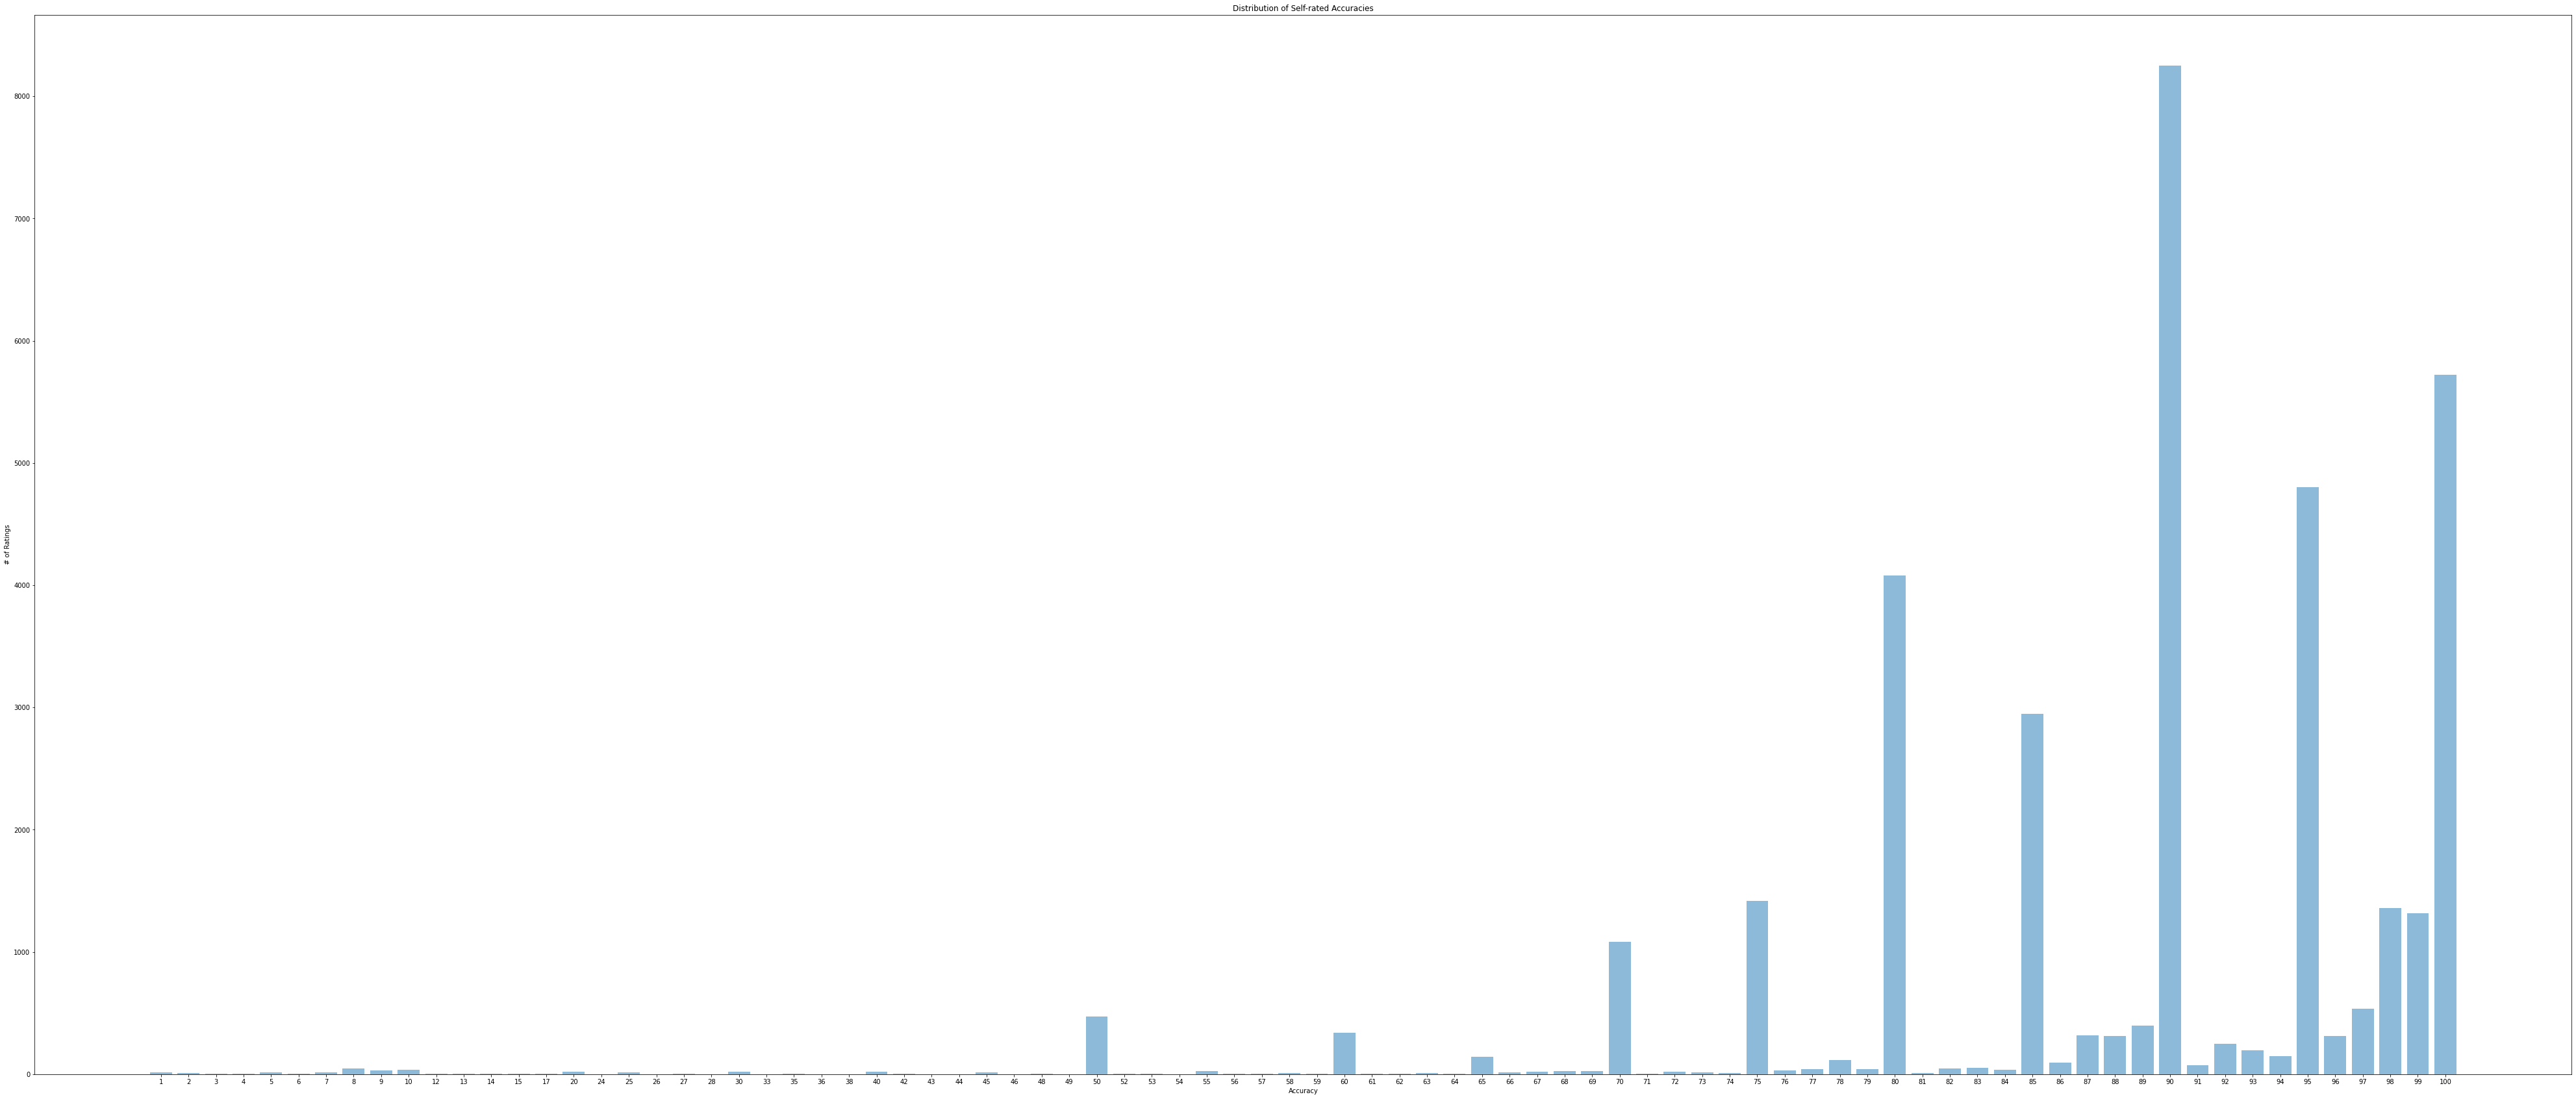

In [ ]:
accuracies_grouped = accuracies_df.groupby('accuracy').count().rename(columns={"gender": "count"})
accuracies_grouped.reset_index(inplace=True)

# plot
create_bar_category(accuracies_grouped['accuracy'], accuracies_grouped['count'], 'Accuracy', '# of Ratings', 'Distribution of Self-rated Accuracies', (70,30))


## 6. Source

*personality_df*: source of HTTP referrer site of test-taker

Possible Values:
  - 1: cartell site website
  - 2: google
  - 3: facebook
  - 4: .edu extension
  - 5: wikipedia
  - 6: no sites or other sites

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



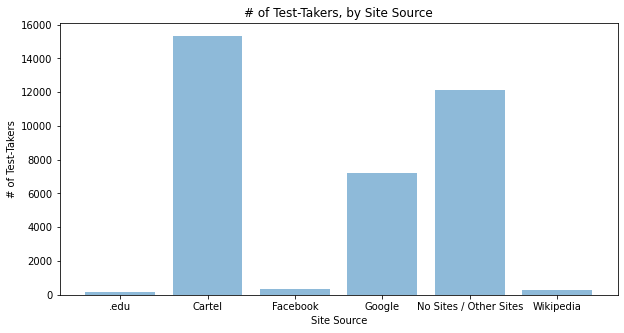

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



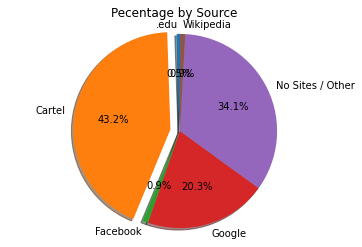

,Site Source,count
0,.edu,188
1,Cartel,15330
2,Facebook,327
3,Google,7213
4,No Sites / Other Sites,12102
5,Wikipedia,307


In [ ]:
test_source = personality_df_split[['source']]
source_dict = {1: 'Cartel', 2: 'Google', 3: 'Facebook', 4: '.edu', 5: 'Wikipedia', 6: 'No Sites / Other Sites'}
test_source['Site Source'] = test_source['source'].map(lambda x: source_dict[x])
basic_vis_groupby_source = test_source[['source', 'Site Source']].groupby(by=['Site Source']).count().rename(columns={"source": "count"})
basic_vis_groupby_source.reset_index(inplace=True)

# plot
create_bar_category(basic_vis_groupby_source['Site Source'], basic_vis_groupby_source['count'], 'Site Source', '# of Test-Takers', '# of Test-Takers, by Site Source', (10,5))

# pie chart
labels = '.edu', 'Cartel', 'Facebook', 'Google', 'No Sites / Other', 'Wikipedia'
sizes = basic_vis_groupby_source[['count']]
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Cartel')
create_pie_chart(labels, sizes, explode, 'Pecentage by Source')

basic_vis_groupby_source

We found that majority of the test takers take the test either on Cartel (43.2%) or other sites (34.1%). This shows the variety in test takers who access the test across various platforms.

# Machine Learning Models




## Clustering

From our correlation matrix within the Exploratory Data Analysis, we saw that within personality traits, there appears to be strong correlation between certain personality traits.  As a preliminary analysis, we utilize an unsupervised clustering model to identify if there are any natural clusters among the personalities.

For our clustering model, we employ a K-Means clustering technique.  First, we only extract the personality columns from our original dataframe.  Next, we perform the "elbow method" to identify the ideal number of clusters to utilize.  In this case, a cluster of 5 was utilized since that was the cluster size that started showing diminishing returns for error reduction.  We then initialized a 5-cluster K-Means classifier and transformed our data.  Plotting the transforming over the classifier's 5 dimensions demonstrated no singificant clustering among our dataset.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from kneed import KneeLocator

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [ ]:
# get all personality columns
personality_columns = [col for col in personality_df_split if col.startswith('Score')]
print(personality_columns)

# extract only the personalities columns
just_personality_df = personality_df_split[personality_columns]
just_personality_df.dropna(inplace=True)
just_personality_df.head()

['Score_A_Warmth', 'Score_B_Reasoning', 'Score_C_EmoStability', 'Score_D_Dominance', 'Score_E_Liveliness', 'Score_F_Conforming', 'Score_G_SocialBoldness', 'Score_H_Sensitivity', 'Score_I_Vigilance', 'Score_J_Abstractness', 'Score_K_Privateness', 'Score_L_Apprehension', 'Score_M_OpenToChange', 'Score_N_SelfReliance', 'Score_O_Perfectionism', 'Score_P_Tension']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension
0,0.4400,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70
1,0.6600,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62
2,0.7000,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52
3,0.7200,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46
4,0.7111,0.6923,0.4800,0.78,0.36,0.56,0.64,0.60,0.54,0.48,0.58,0.68,0.66,0.66,0.66,0.66


In [ ]:
# perform elbow method to determine best number of clusters
sse = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(just_personality_df)
    sse.append(kmeans.inertia_)

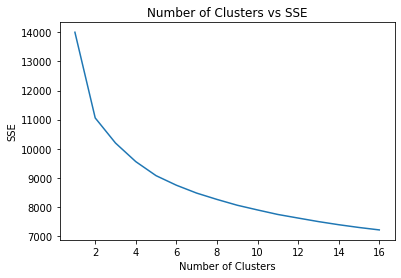

In [ ]:
# plot SSE
plt.plot(range(1, 17), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Number of Clusters vs SSE")
plt.show()

In [ ]:
# identify knee for number of clusters
knee = KneeLocator(range(1, 17), sse, curve="convex", direction="decreasing")
print("The ideal cluster is: " + str(knee.elbow))

The ideal cluster is: 5


In [ ]:
# utilize 5 clusters to fit a KMeans model and predict based on personality type
kmeans = KMeans(n_clusters=5, init='random', max_iter=100, random_state=0)
kmeans.fit(just_personality_df)
kmeans_pred = kmeans.fit_predict(just_personality_df)
kmeans_pred

array([1, 4, 1, ..., 2, 0, 0], dtype=int32)

To identify the validity of our result, we plot each sample transformation across each of the classifier's 5 dimensions.  The red dots identify the cluster centers and each other color is a seperate cluster.  From the plots, it is clear there appears to no inherent clusters among the dataset.  The clusters centers are all close to one another and each cluster has multiple plots overlapping with one another.  This suggests that when regarding personality traits as a whole, there appears to be clusters among individuals (e.g.: there are not a lot of people who all simultaenously score heavy in warmth, apprephension, liveliness, etc.).  This is as expected, though as certain pairs of personality traits seem to be correlated, most are not, so it would be extremely difficult to find clusters that match multiple personalities simultaneously, much less 16.

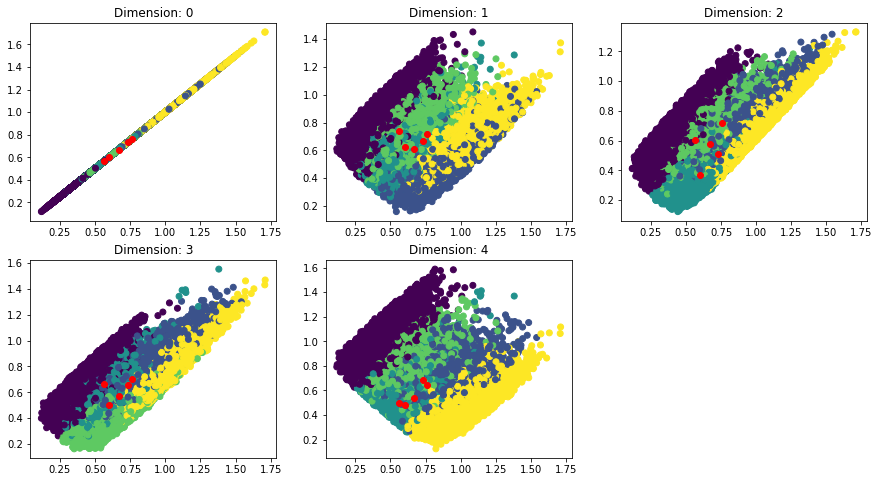

In [ ]:
# transform the dataset
kmeans_x = kmeans.transform(just_personality_df)
centers = kmeans.cluster_centers_
plt.figure(figsize=(15,8))
# plot k means for each dimension
for i in range(kmeans_x.shape[1]):
  plt.subplot(231 + i)
  plt.scatter(kmeans_x[:, 0], kmeans_x[:, i], c=kmeans_pred)
  plt.scatter(centers[:, 0], centers[:, i], c='red')
  plt.title("Dimension: " + str(i))

## Linear Regression

We will train a linear regression model using sklearn to predict the age of a test respondent.

Since we want to predict age based on test taker answers to the questions of the personality test, we can drop irrelevant columns (gender, source, accuracy, elapsed)

In [ ]:
#first create new df with only relevant columns
personality_age_lr = personality_df_split.drop(columns=['gender','source','elapsed','accuracy','country','id'])

#drop rows with null scores
personality_age_lr.dropna(inplace=True)
personality_age_lr['age'] = personality_age_lr['age']/100
personality_age_lr

,age,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension
0,0.17,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.6800,0.60,0.92,0.42,0.60,0.6800,0.68,0.50,0.70
1,0.37,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.6800,0.62,0.72,0.56,0.60,0.6200,0.76,0.48,0.62
2,0.31,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.6000,0.54,0.76,0.60,0.58,0.7200,0.74,0.48,0.52
3,0.32,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.5800,0.52,0.90,0.54,0.60,0.5800,0.84,0.28,0.46
5,0.36,0.78,0.6615,0.5600,0.72,0.56,0.36,0.60,0.7800,0.44,0.62,0.44,0.60,0.6200,0.70,0.44,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.24,0.38,0.4308,0.5000,0.44,0.44,0.56,0.50,0.4400,0.44,0.38,0.50,0.38,0.4400,0.38,0.50,0.38
49155,0.22,0.72,0.6615,0.5600,0.68,0.60,0.40,0.72,0.6889,0.72,0.74,0.36,0.58,0.7556,0.62,0.52,0.48
49156,0.29,0.52,0.6154,0.7000,0.58,0.50,0.68,0.42,0.7000,0.36,0.60,0.52,0.64,0.5800,0.62,0.62,0.44
49157,0.48,0.70,0.7231,0.7400,0.76,0.64,0.20,0.80,0.5800,0.58,0.68,0.34,0.32,0.7400,0.58,0.36,0.40


To see if anything is correlated:

Then, we split the data into x (features) & y (label)

In this case, the features are anything but age and the label is age.



In [ ]:
label = personality_age_lr['age']
features = personality_age_lr.drop(columns = ['age'])

Then, we split data into train and test sets with 80% for training and rest for testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)

We first see how linear regression performs without PCA:

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

rgr = LinearRegression()

#see how well fits train data
# rgr.fit(x_train, y_train)

# train_pred = rgr.predict(x_train)
# mse_train = metrics.mean_squared_error(y_train, train_pred)
# metrics.r2_score(y_train, train_pred)

#see how well predicts test data
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)
mse_test = metrics.mean_squared_error(y_test, y_pred)

print('Predictions:', y_pred)
print('MSE:', mse_test)
print('r2 Score:', metrics.r2_score(y_test, y_pred))


Predictions: [0.30376562 0.28419205 0.21896174 ... 0.217335   0.27252043 0.22972107]
MSE: 0.009367522804212821
r2 Score: 0.2037799839921277


### PCA for Dimensionality Reduction

We use principal component analysis to reduce number of dimensions of the dataset and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep.

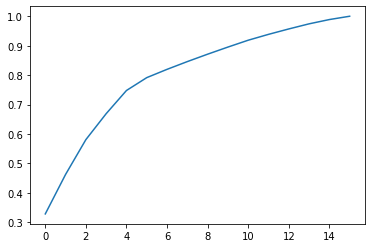

In [ ]:
import numpy as np
from sklearn.decomposition import PCA


pca = PCA().fit(x_train)
c_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(c_vs_variance)

The plot appears to not have significant diminishing returns at one component value, so we keep 12 components, where about 95% of the variance is accounted for.

In [ ]:
pca = PCA(n_components=12)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

Then, we run with the PCA results:

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

rgr = LinearRegression()

#see how well fits train data
rgr.fit(x_train, y_train)

train_pred = rgr.predict(x_train)
mse_train = metrics.mean_squared_error(y_train, train_pred)
metrics.r2_score(y_train, train_pred)

#see how well predicts test data
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)
mse_test = metrics.mean_squared_error(y_test, y_pred)

print('PCA Predictions:', y_pred)
print('MSE:', mse_test)
print('r2 Score:', metrics.r2_score(y_test, y_pred))

PCA Predictions: [0.2901026  0.28355467 0.22176528 ... 0.21491503 0.2815191  0.23319704]
MSE: 0.009508407358604304
r2 Score: 0.19180508897480253


###Running with Regularization
Since we have highly dimensional data and the score is quite low, we will run with regularization to try to improve predictive accuracy. In particular, ridge regularization should be the way to go since we want to keep all predictors in the model. Trying ridge, lasso and elastic net below and their respective scores confirm this. 

However, even with regularization, the overall score of the model doesn't increase, suggesting the issue with this model isn't with overfitting; instead, it's likely that the data itself simply does not have a strong linear trend.

Trying ridge regularization:

In [ ]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(x_train, y_train)

ridge_pred = ridge_reg.predict(x_test)
mse_test = metrics.mean_squared_error(y_test, ridge_pred)

print('Ridge Predictions:', ridge_pred)
print('MSE:', mse_test)
print('r2 Score:', metrics.r2_score(y_test, ridge_pred))

Ridge Predictions: [0.23678505 0.14327277 0.43168965 ... 0.36783723 0.22955755 0.29750792]
MSE: 47343044132.74207
r2 Score: -0.00010268015338876779


Trying lasso regularization:

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=.1)
lasso_reg.fit(x_train, y_train)

lasso_pred = lasso_reg.predict(x_test)
mse_test = metrics.mean_squared_error(y_test, lasso_pred)

print('Lasso Predictions:', lasso_pred)
print('MSE:', mse_test)
print('r2 Score:', metrics.r2_score(y_test, lasso_pred))

Lasso Predictions: [0.27995739 0.27995739 0.27995739 ... 0.27995739 0.27995739 0.27995739]
MSE: 47343043780.4562
r2 Score: -0.00010267271149233537


Trying elastic net:

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)

elastic_net_pred = elastic_net.predict(x_test)
mse_test = metrics.mean_squared_error(y_test, elastic_net_pred)

print('Elastic Net Predictions:', elastic_net_pred)
print('MSE:', mse_test)
print('r2 Score:', metrics.r2_score(y_test, elastic_net_pred))

Elastic Net Predictions: [0.27995739 0.27995739 0.27995739 ... 0.27995739 0.27995739 0.27995739]
MSE: 47343043780.4562
r2 Score: -0.00010267271149233537


## Logistic Regression

We utilize logistic regression models to classify respondents by gender and development level of their country of location. We consider these both as binary categorical variables, so logistic regression is fitting here.


###Predicting Gender

We will first train a logistic regression model to predict the gender of a respondent.

In [ ]:
# first create new df with only relevant columns
personality_gender_lr = personality_df_split.drop(columns=['age','source','elapsed','accuracy','country','id'])

# filter out missing or "other" genders (so it's just female and male remaining)
personality_gender_lr = personality_gender_lr[personality_gender_lr['gender'] < 3]
personality_gender_lr = personality_gender_lr[personality_gender_lr['gender'] > 0]

# encode female as 0 and male as 1
personality_gender_lr['gender'] = personality_gender_lr['gender'].map(lambda x: 0 if x == 2 else 1)

# drop nulls
personality_gender_lr.dropna(inplace=True)
personality_gender_lr

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,...,M2,M3,M4,M5,M6,M7,M8,M9,M10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,gender
0,1,4,2,3,3,2,3,4,4,3,4,4,5,4,5,4,5,4,1,2,1,1,1,4,5,4,4,2,4,4,3,3,2,4,3,5,5,4,4,3,...,4,4,4,4,1,1,1,3,3,4,4,4,4,4,5,5,4,4,3,4,2,3,4,3,2,2,4,4,4,5,5,5,4,4,5,1,2,5,2,1
1,4,3,4,3,4,4,4,4,2,2,4,4,4,4,5,4,3,2,3,2,4,1,1,1,2,3,3,2,5,4,4,3,3,4,2,4,4,4,5,4,...,2,4,4,2,1,1,1,2,2,4,2,4,5,5,5,5,2,4,1,3,2,4,2,3,2,2,3,4,4,4,4,4,2,3,2,3,2,2,2,1
2,3,4,4,4,4,4,4,3,2,2,4,4,5,5,4,4,4,4,2,2,2,2,2,2,4,4,3,3,3,4,2,3,0,3,3,2,2,3,4,3,...,4,5,4,4,2,1,2,1,2,4,4,5,4,4,5,4,3,4,1,3,2,3,3,3,2,3,4,3,3,3,3,4,2,4,2,2,3,3,3,1
3,4,5,4,4,4,3,3,2,2,2,4,2,4,5,4,5,4,4,3,3,3,2,4,3,2,3,4,3,3,2,2,3,4,3,2,3,4,2,3,3,...,4,5,3,2,1,4,2,2,2,4,5,5,5,5,5,5,1,3,3,2,2,2,2,3,4,5,4,5,4,4,2,2,2,3,4,2,3,4,4,1
4,4,0,4,4,4,3,5,1,2,4,2,4,4,5,5,4,4,5,4,1,5,1,2,2,4,3,3,4,4,4,4,3,2,5,4,3,4,5,4,1,...,4,4,4,5,1,2,2,1,2,3,3,4,4,5,4,5,4,4,2,3,3,5,3,4,2,1,2,1,4,4,3,4,3,4,3,4,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49151,5,5,5,5,5,5,5,1,1,1,4,3,5,4,5,1,4,5,5,1,4,2,1,4,5,4,5,5,1,2,3,1,1,4,5,5,2,3,2,4,...,5,5,4,5,2,1,4,2,2,1,5,4,1,5,5,2,5,5,3,3,5,5,5,4,5,5,5,5,5,1,1,1,1,3,1,1,5,5,5,0
49152,4,4,4,4,4,4,4,2,2,2,4,3,4,4,4,4,4,4,4,4,3,2,2,2,4,2,4,4,5,5,4,4,3,2,4,2,3,2,2,4,...,4,5,4,4,2,2,2,2,2,4,3,4,4,4,4,5,4,3,2,3,2,4,2,3,3,4,3,5,4,2,2,2,3,2,3,2,4,4,4,0
49156,2,4,2,3,3,3,4,4,2,4,2,4,4,4,4,4,4,4,4,4,4,1,2,2,4,3,4,4,2,1,1,1,2,4,3,4,2,5,3,3,...,4,4,2,4,2,2,2,3,3,2,4,4,4,4,4,4,4,2,4,4,3,4,3,4,2,2,2,2,4,2,2,4,4,3,2,3,4,5,4,0
49157,4,4,4,4,4,4,4,4,1,3,4,3,4,5,3,4,4,2,1,2,1,1,2,4,5,4,3,3,2,2,1,1,1,4,3,5,4,5,3,1,...,5,4,4,5,1,1,3,1,1,2,4,3,4,2,3,3,3,3,1,1,3,1,2,4,4,4,5,3,2,2,2,3,3,4,2,2,4,5,4,1


In [ ]:
# use gender as the label and the rest of the columns as features
logr_label = personality_gender_lr['gender']
logr_features = personality_gender_lr.drop(columns = ['gender']) 

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
logr_x_train, logr_x_test, logr_y_train, logr_y_test = train_test_split(logr_features, logr_label, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

logr = LogisticRegression()

# fit the training data to the logistic regression
logr.fit(logr_x_train, logr_y_train)

# predictions based on x test
logr_y_pred = logr.predict(logr_x_test)

print('Predictions:', logr_y_pred)
print('MSE:', mean_squared_error(logr_y_test, logr_y_pred))

accuracy = accuracy_score(logr_y_pred,logr_y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Predictions: [0 0 0 ... 1 1 0]
MSE: 0.2058070025619129
Accuracy: 79.4%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



With our logistic regression model we found that our model could predict gender with an accuracy of 79.4%. Comparing our logistic regression model accuracy score predicting gender with our linear regression model scores predicting age, this result is in line with our initial observation in our correlation matrix, where we noticed that although gender correlations with personality traits remained low, they were still significantly higher than age correlations with personality traits suggesting that personality may in fact be a good predictor for gender and that certain personalities may be shared across genders. 

#### Model Evaluation




*Confusion matrix*:

To evaluate the performance of our logistic regression model, we use a confusion matrix to visualize the amount of false negatives and false positives that occurred as a result of applying our classification model.

In [ ]:
from sklearn import metrics

# generate confusion matrix
cm = metrics.confusion_matrix(logr_y_test, logr_y_pred)
print(cm)

[[3466  656]
 [ 790 2114]]


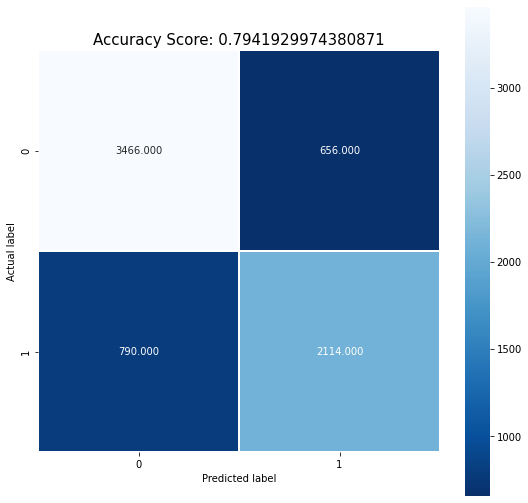

In [ ]:
# plot
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

From the confusion matrix above, we see that although there are more true positives (2114) and true negatives (3466) that are classified, there is still a significant amount of false positives (656) and false negatives (790). 

*Learning curve*:

Next, we generate a learning curve to find the relationship between training set size and our chosen model evaluation metric on your training and validation sets, which is accuracy and see whether our model is suffering from bias or variance.

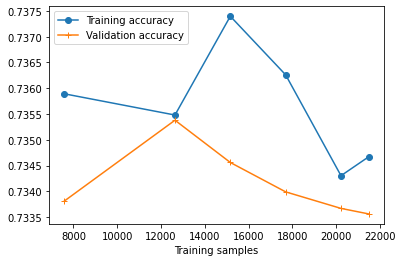

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=logr, X=logr_x_train,
                 y=logr_y_train,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.legend()
  

From the learning curve, we found that to ensure validation accuracy and an appropriate amount of training accuracy, the ideal training sample is a little over 12000. This could explain the potential bias of our model predicting female as majority of our test takers identify as female.

###Developed vs Developing

Now, we build a logistic regression model to predict the type (developed vs developing) of country a respondent is from:

In [ ]:
# join personality df with region df
join_UN = personality_df_split.merge(unsd_dropped_df, left_on='country', right_on='ISO-alpha2 Code')

# drop all unnecessary columns
country_drop_cols = ['age', 'gender', 'accuracy', 'source', 'elapsed', 'id', 'ISO-alpha2 Code', 'ISO-alpha3 Code',
                     'Least Developed Countries (LDC)', 'Land Locked Developing Countries (LLDC)',	'Small Island Developing States (SIDS)']
join_UN_dropped = join_UN.drop(country_drop_cols, axis=1)
join_UN_dropped.head()

,country,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Country or Area,Region Name,Sub-region Name,Developed / Developing Countries
0,US,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,United States of America,Americas,Northern America,Developed
1,US,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,United States of America,Americas,Northern America,Developed
2,US,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,United States of America,Americas,Northern America,Developed
3,US,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,United States of America,Americas,Northern America,Developed
4,US,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,United States of America,Americas,Northern America,Developed


In [ ]:
# extract only the region names (drop development level)
personality_columns = [col for col in personality_df_split if col.startswith('Score')]
development_extract_columns = personality_columns.copy()
development_extract_columns.append('Developed / Developing Countries')
development_df = join_UN_dropped[development_extract_columns]
development_df.dropna(inplace=True)
development_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Developed / Developing Countries
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,Developed
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,Developed
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,Developed
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,Developed
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,Developed


In [ ]:
# change development column to 0 (developing) vs 1 (developed)
development_col = development_df['Developed / Developing Countries']
development_binary = [1 if val == 'Developed' else 0 for val in development_col]
development_df['Developed / Developing Countries'] = development_binary
development_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Developed / Developing Countries
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,1
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,1
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,1
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,1
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,1


In [ ]:
# we will predict the probability that a given respondent from a developed/developing country
development_label = development_df['Developed / Developing Countries']
development_features = development_df.drop(columns=['Developed / Developing Countries'])

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
development_x_train, development_x_test, development_y_train, development_y_test = train_test_split(development_features, development_label, test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

development_logr = LogisticRegression()

# fit the training data with logistic regression
development_logr.fit(development_x_train, development_y_train)

# predictions on x test
development_y_pred = development_logr.predict(development_x_test)

print('Development Level Predictions:', development_y_pred)
print('MSE:', mean_squared_error(development_y_test, development_y_pred))

accuracy = accuracy_score(development_y_pred,development_y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Development Level Predictions: [1 1 1 ... 1 1 1]
MSE: 0.1964415020171718
Accuracy: 80.4%


With our logistic regression model we found that our model could predict development level with an accuracy of 80.4%. However, we also realize that the large majority of test takers report to be located in developed countries so if our model predicted developed most of the time it would be considered accurate and thus explaining the high accuracy and potential bias. 

####Model Evaluation

*Confusion matrix*:

To evaluate the performance of our logistic regression model, we use a confusion matrix to visualize the amount of false negatives and false positives that occurred as a result of applying our classification model.

In [ ]:
from sklearn import metrics

# generate confusion matrix
cm = metrics.confusion_matrix(development_y_test, development_y_pred)
print(cm)

[[  15 1463]
 [  20 5531]]


In [ ]:
# plot confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

From the confusion matrix above, we see that although there are more true positives (15) and true negatives (5531) combined that are classified, there is still a significant amount of false negatives (1453). 

*Learning curve*:

Next, we generate a learning curve to find the relationship between training set size and our chosen model evaluation metric on your training and validation sets, which is accuracy and see whether our model is suffering from bias or variance.

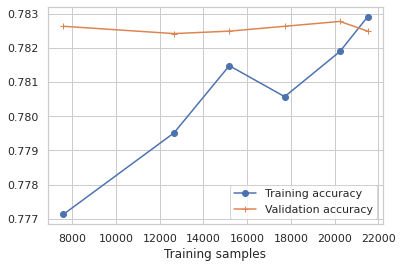

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=development_logr, X=development_x_train,
                 y=development_y_train,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.legend()

From the learning curve, we found that to ensure validation accuracy and an appropriate amount of training accuracy, the ideal training sample is a little over 21000. This could explain the potential bias of our model predicting developed as the development model as an evident majority of our test takers identify as located at a developed country.

## Random Forest

Finally, we utilize Random Forest decision trees to fit the training data to it and classify respondents by country region and development level. A random forest classifier model was utilized since both country region and development level are categorical data, not numerical, so deploying a linear regression model would not feasible.




In [ ]:
# import necessary packages for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
# join personality df with USND df
join_UN = personality_df_split.merge(unsd_dropped_df, left_on='country', right_on='ISO-alpha2 Code')

# drop all non-country related columns
country_drop_cols = ['age', 'gender', 'accuracy', 'source', 'elapsed', 'id', 'ISO-alpha2 Code', 'ISO-alpha3 Code',
                     'Least Developed Countries (LDC)', 'Land Locked Developing Countries (LLDC)',	'Small Island Developing States (SIDS)']
join_UN_dropped = join_UN.drop(country_drop_cols, axis=1)
join_UN_dropped.head()

,country,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Country or Area,Region Name,Sub-region Name,Developed / Developing Countries
0,US,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,United States of America,Americas,Northern America,Developed
1,US,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,United States of America,Americas,Northern America,Developed
2,US,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,United States of America,Americas,Northern America,Developed
3,US,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,United States of America,Americas,Northern America,Developed
4,US,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,United States of America,Americas,Northern America,Developed


In [ ]:
# write function for doing random forest
def perform_classifier(xtrain, xtest, ytrain, ytest):
  # train classifier (max depth taken from grid search later on)
  clf = RandomForestClassifier(n_estimators=140, max_depth=15)
  # fit the model and gain predictions
  clf.fit(xtrain, ytrain)
  ypred = clf.predict(xtest)
  # identify score
  score = accuracy_score(ytest, ypred)
  return clf, score

###Predicting Region

We first attempt to classify respondents by regions.  According to the UNSD, there are 5 regions: Africa, Asia, Americas, Europe, and Oceania.  Importantly, from our exploratory data analysis, we noticed that there appears to be an extreme overrepresentation of test-takers from the Americas, and so random sampling techniques needed to be employed. 
Otherwise, the model can just predict the Americas for every instance and still have high probability of being correct since so much of the data comes from the Americas.

In [ ]:
# extract only the region names (drop development level)
region_extract_columns = personality_columns.copy()
print(region_extract_columns)
region_extract_columns.append('Region Name')
region_df = join_UN_dropped[region_extract_columns]
region_df.dropna(inplace=True)
region_df.head()

['Score_A_Warmth', 'Score_B_Reasoning', 'Score_C_EmoStability', 'Score_D_Dominance', 'Score_E_Liveliness', 'Score_F_Conforming', 'Score_G_SocialBoldness', 'Score_H_Sensitivity', 'Score_I_Vigilance', 'Score_J_Abstractness', 'Score_K_Privateness', 'Score_L_Apprehension', 'Score_M_OpenToChange', 'Score_N_SelfReliance', 'Score_O_Perfectionism', 'Score_P_Tension']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Region Name
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,Americas
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,Americas
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,Americas
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,Americas
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,Americas


In [ ]:
# get labels features,
region_label = region_df['Region Name']
region_features = region_df.drop(columns=['Region Name'])
region_x_train, region_x_test, region_y_train, region_y_test = train_test_split(region_features, region_label, test_size=.3)

**Detour: One-Hot Encoding**

Though the random forest classifier itself was allowed to intake categorical data, such as strings, the Grid Search did not.  Thus, we employ one-hot encoding to split the regions into 5 columns, each taking on a numerical value of 1 (belonging to region) or 0 (not belonging to region).

In [ ]:
# one-hot encode regions
region_ohe_df = pd.get_dummies(region_df, columns=['Region Name'])
region_ohe_df.head()

,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Region Name_Africa,Region Name_Americas,Region Name_Asia,Region Name_Europe,Region Name_Oceania
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,0,1,0,0,0
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,0,1,0,0,0
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,0,1,0,0,0
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,0,1,0,0,0
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,0,1,0,0,0


In [ ]:
# get labels, features, and training/testing for one hot encoding
region_ohe_columns = [col for col in region_ohe_df if col.startswith('Region Name')]
region_ohe_label = region_ohe_df[region_ohe_columns]
region_ohe_features = region_ohe_df.drop(columns=region_ohe_columns)
region_ohe_x_train, region_ohe_x_test, region_ohe_y_train, region_ohe_y_test = train_test_split(region_ohe_features, region_ohe_label, test_size = .3)

In [ ]:
# run grid search
""" Depths: 
[2, 5, 10] => 10
[25, 50, 75] => 25
[10, 15, 20, 25] => 15
"""
region_gs_clf = RandomForestClassifier()
region_params = {'max_depth': [10, 15, 20, 25], 'n_estimators': [140]}
region_grid_search = GridSearchCV(estimator = region_gs_clf, param_grid = region_params, cv = 5, verbose = 0, scoring='r2')
region_grid_search.fit(region_ohe_x_train, region_ohe_y_train)
region_grid_search.best_params_

{'max_depth': 20, 'n_estimators': 140}


**Adjusting for Data Imbalance**

Next, we will perform the random forest classifier on three sets of sampling: direct (no sampling techniques employed), over sampling employed, and undersampling employed. Amongst the three sampling, direct sampling had the highest accuracy, followed by oversampling then undersampling. 

 Again, it is important to stress that the imbalance within the sampling means that the direct sampling classifier can simply return "Americas" and have a high probability of being correct.  Thus, though the direct sampling classifier had the best accuracy score, it may not necessarily be the best classifier, especially if we recieve an extended dataset where the test-taker's region of origin is more geographically balanced.  As a result, we cannot simply analyze only accuracy, but must also examine other scores such as  precision, recall, and F1 score to identify false positve / false negative rates.  
 
 With regards to the oversampling and undersampling classifiers, the oversampling classifer had an accuracy close to the direct sampling, while the undersampling classifier had an accuracy less than one half of either.  A possible explanation for the undersampling classifier's low accuracy is that since there are certain regions with such low dataset (Africa has less than 200, Asia has less than 2500), when the classifier repeatedly draws samples from these two classes, there is a high probability it draws the same sample multiple times.  This results in the classifier overfitting for the training data and being pretty much useless for the testing data.

In [ ]:
# direct sampling
region_direct_clf, region_direct_score = perform_classifier(region_x_train, region_x_test, region_y_train, region_y_test)
print("The accuracy of the random forest classifier on direct region dataset is: " + str(region_direct_score))

The accuracy of the random forest classifier on direct region dataset is: 0.578551724137931


In [ ]:
# over sampling reducer
region_oversampler = RandomOverSampler()
region_x_ros_over, region_y_ros_over = region_oversampler.fit_resample(region_x_train, region_y_train)
region_over_clf, region_over_score = perform_classifier(region_x_ros_over, region_x_test, region_y_ros_over, region_y_test)
print("The accuracy of the random forest classifier on direct region dataset is: " + str(region_over_score))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



The accuracy of the random forest classifier on direct region dataset is: 0.5137241379310344


In [ ]:
# under sampling reducer
region_undersampler = RandomUnderSampler()
region_x_ros_under, region_y_ros_under = region_undersampler.fit_resample(region_x_train, region_y_train)
region_under_clf, region_under_score = perform_classifier(region_x_ros_under, region_x_test, region_y_ros_under, region_y_test)
print("The accuracy of the random forest classifier on direct region dataset is: " + str(region_under_score))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



The accuracy of the random forest classifier on direct region dataset is: 0.242


**Confusion Matrix and Additional Scores**

Though the overall accuracy score suggests that the direct sampling classifier is an ok classifier, examination of the confusion matrix for each class shows that it is actually a bad classifier.  For example, consider Africa, which has actual 175 values, but the classifiers predict 0 values.  For Asia, Europe, and Oceania, the same patterns hold, with the classifier predicting 310, 58, and 2 values respectively, even though more than 800 values belong in each class.  For North America, the opposite trend occurs, with many non-Americas values being classified as such.  These patterns support our previous hypothesis that the overrepresentation of Americas values results in the direction classifier demonstrating a strong inclination for classifying values as from the Americas for any value.  As a result, non-Americas classes (Africa, Asia, Europe, and Oceania) have a high number of false negatives while the Americas has a high number of false positives. 

With regards to the oversampling classifier, despite it having a lower accuracy score than the direct sampling classifier, examination of the confusion matrix actually shows that it is a better classifier than the direct sampling classifier.  For example, for the Asia class, while the direct sampling classifier only predicted 310 true positives, the oversampling classifier predicted nearly three times more at 1086 true positives.  Across the non-Americas classes, true positive values increased while for the Americas class, true negatives also increased, suggesting that the oversampling classifier has a weaker inclination for classifying values as Americas than the direct sampling classifier.  Ultimately, for a dataset that is more geographically balanced, the oversampling classifier should yield a stronger accuracy than the direct sampling classifier, as a more geographically balanced dataset will not only contain mostly Americas value.


Direct Sampling Precision: 0.579
Direct Sampling Recall: 0.579
Direct Sampling F1: 0.579


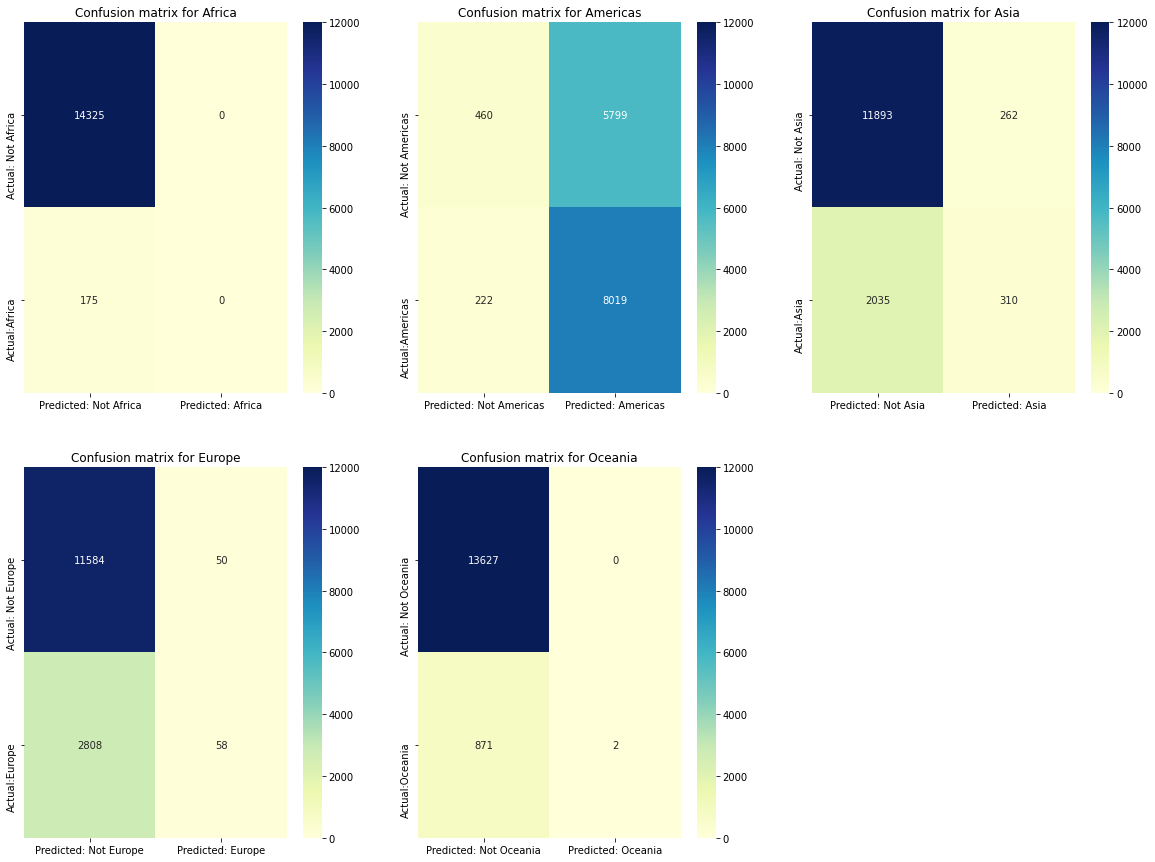

In [ ]:
# Direct Sampling
# set region classes to numbers
region_y_pred = region_direct_clf.predict(region_x_test)
(test_unique, test_counts) = np.unique(region_y_test, return_counts=True)
(pred_unique, pred_counts) = np.unique(region_y_pred, return_counts=True)
# get multilabel confusion matrix
regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
region_confusion_matrix = multilabel_confusion_matrix(y_true=region_y_test, y_pred=region_y_pred)

# create regional confusion matricies
region_confusion_matricies = []
for i in range(len(region_confusion_matrix)):
   desc = regions[i]
   matrix = pd.DataFrame(data=region_confusion_matrix[i],
                           columns=['Predicted: Not ' + desc,'Predicted: ' + desc],
                            index=['Actual: Not ' + desc,'Actual:' + desc])
   region_confusion_matricies.append(matrix)


# generate_heat_maps
plt.figure(figsize=(20,15))
for i in range(len(region_confusion_matrix)):
  plt.subplot(231 + i)
  plt.title("Confusion matrix for %s" %regions[i])
  sns.heatmap(region_confusion_matricies[i], annot=True,fmt='d',cmap="YlGnBu", vmin=0, vmax=12000)

# print score

print('Direct Sampling Precision: %.3f' %precision_score(y_true=region_y_test, y_pred=region_y_pred,labels=regions, average='micro'))
print('Direct Sampling Recall: %.3f' %recall_score(y_true=region_y_test, y_pred=region_y_pred,labels=regions, average='micro'))
print('Direct Sampling F1: %.3f' %f1_score(y_true=region_y_test, y_pred=region_y_pred,labels=regions, average='micro'))

Direct Sampling Precision: 0.5137241379
Direct Sampling Recall: 0.5137241379
Direct Sampling F1: 0.5137241379


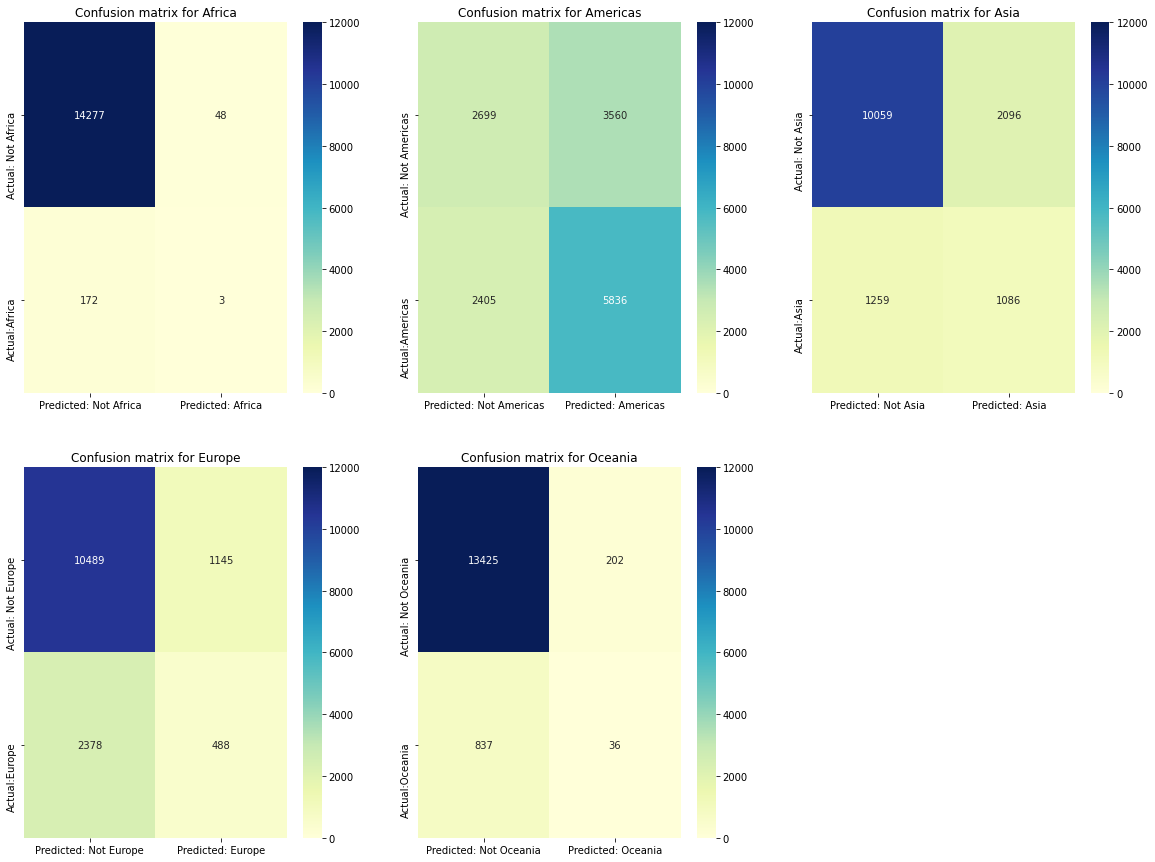

In [ ]:
# Over sampling
# set region classes to numbers
region_y_pred_over = region_over_clf.predict(region_x_test)
# get multilabel confusion matrix
regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
region_confusion_matrix_over = multilabel_confusion_matrix(y_true=region_y_test, y_pred=region_y_pred_over)

# create regional confusion matricies
region_confusion_matricies_over = []
for i in range(len(region_confusion_matrix_over)):
   desc = regions[i]
   matrix = pd.DataFrame(data=region_confusion_matrix_over[i],
                           columns=['Predicted: Not ' + desc,'Predicted: ' + desc],
                            index=['Actual: Not ' + desc,'Actual:' + desc])
   region_confusion_matricies_over.append(matrix)


# generate_heat_maps
plt.figure(figsize=(20,15))
for i in range(len(region_confusion_matrix)):
  plt.subplot(231 + i)
  plt.title("Confusion matrix for %s" %regions[i])
  sns.heatmap(region_confusion_matricies_over[i], annot=True,fmt='d',cmap="YlGnBu", vmin=0, vmax=12000)

# print score
print('Oversampling Precision: %.3f' %precision_score(y_true=region_y_test, y_pred=region_y_pred_over,labels=regions, average='micro'))
print('Oversampling Recall: %.3f' %recall_score(y_true=region_y_test, y_pred=region_y_pred_over,labels=regions, average='micro'))
print('Oversampling F1: %.3f' %f1_score(y_true=region_y_test, y_pred=region_y_pred_over,labels=regions, average='micro'))

In [ ]:
# sum up confusion matrix for reach and get true/false postive/negative scores
region_matrix_sum =region_confusion_matrix[1]
region_tn = region_matrix_sum[0][0]
region_fp = region_matrix_sum[0][1]
region_fn = region_matrix_sum[1][0]
region_tp = region_matrix_sum[1][1]

# calculate scores
region_fpr = region_fp / (region_fp + region_tn)
region_fnr = region_fn / (region_fn + region_tp)
region_precision = region_tp / (region_tp + region_fp)
region_recall = region_tp / (region_fn + region_tp)
region_specificity = region_tn / (region_tn + region_fp)
region_f1 = (2 * region_precision * region_recall) / (region_precision + region_recall)

region_matrix_sum_over = region_confusion_matrix_over[1]
region_tn_over = region_matrix_sum_over[0][0]
region_fp_over = region_matrix_sum_over[0][1]
region_fn_over = region_matrix_sum_over[1][0]
region_tp_over = region_matrix_sum_over[1][1]

# calculate scores
region_fpr_over = region_fp_over / (region_fp_over + region_tn_over)
region_fnr_over = region_fn_over / (region_fn_over + region_tp_over)
region_precision_over = region_tp_over / (region_tp_over + region_fp_over)
region_recall_over = region_tp_over / (region_fn_over + region_tp_over)
region_specificity_over = region_tn_over / (region_tn_over + region_fp_over)
region_f1_over = (2 * region_precision_over * region_recall_over) / (region_precision_over + region_recall_over)

print("The Matrix Sum for Direct Sampling")
print(region_matrix_sum)
print("The Matrix Sum for Oversampling")
print(region_matrix_sum_over)
print('False Positive rate for direct sampling is %.3f, for oversampling is %.3f' %(region_fpr, region_fpr_over))
print('False Negative rate for direct sampling is %.3f, for oversampling is %.3f' %(region_fnr, region_fnr_over))
print('Precision for direct sampling is %.3f, for oversampling is %.3f' %(region_precision, region_precision_over))
print('Recall for direct sampling is %.3f, for oversampling is %.3f' %(region_recall, region_recall_over))
print('Specificity for direct sampling is %.3f, for oversampling is %.3f' %(region_specificity, region_specificity_over))
print('F1 for direct sampling is %.3f, for oversampling is %.3f' %(region_f1, region_f1_over))

The Matrix Sum for Direct Sampling
[[ 460 5799]
 [ 222 8019]]
The Matrix Sum for Oversampling
[[2699 3560]
 [2405 5836]]
False Positive rate for direct sampling is 0.927, for oversampling is 0.569
False Negative rate for direct sampling is 0.027, for oversampling is 0.292
Precision for direct sampling is 0.580, for oversampling is 0.621
Recall for direct sampling is 0.973, for oversampling is 0.708
Specificity for direct sampling is 0.073, for oversampling is 0.431
F1 for direct sampling is 0.727, for oversampling is 0.662


###Developed vs Developing

Next, we try to build a random forest model for classifying respondent into originating from developed/developing country. Similar to regions, since the data is  disproportionate (Developed), we need to try random sampling and over/under sampling to balance out the samples.

In [ ]:
# extract only the region names (drop development level)
development_extract_columns = personality_columns.copy()
development_extract_columns.append('Developed / Developing Countries')
development_df = join_UN_dropped[development_extract_columns]
development_df.dropna(inplace=True)
development_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Developed / Developing Countries
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,Developed
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,Developed
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,Developed
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,Developed
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,Developed


In [ ]:
# change development column to 0 (developing) vs 1 (developed)
development_col = development_df['Developed / Developing Countries']
development_binary = [1 if val == 'Developed' else 0 for val in development_col]
development_df['Developed / Developing Countries'] = development_binary
development_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Score_A_Warmth,Score_B_Reasoning,Score_C_EmoStability,Score_D_Dominance,Score_E_Liveliness,Score_F_Conforming,Score_G_SocialBoldness,Score_H_Sensitivity,Score_I_Vigilance,Score_J_Abstractness,Score_K_Privateness,Score_L_Apprehension,Score_M_OpenToChange,Score_N_SelfReliance,Score_O_Perfectionism,Score_P_Tension,Developed / Developing Countries
0,0.44,0.8308,0.5600,0.66,0.54,0.38,0.48,0.68,0.60,0.92,0.42,0.60,0.68,0.68,0.50,0.70,1
1,0.66,0.6769,0.3400,0.66,0.50,0.44,0.58,0.68,0.62,0.72,0.56,0.60,0.62,0.76,0.48,0.62,1
2,0.70,0.7538,0.5333,0.54,0.38,0.44,0.36,0.60,0.54,0.76,0.60,0.58,0.72,0.74,0.48,0.52,1
3,0.72,0.6462,0.5200,0.48,0.60,0.44,0.56,0.58,0.52,0.90,0.54,0.60,0.58,0.84,0.28,0.46,1
4,0.68,0.8308,0.4800,0.58,0.26,0.62,0.44,0.62,0.42,0.64,0.30,0.74,0.74,0.66,0.56,0.52,1


**Adjusting for Data Imbalance**

Again, we will perform the random forest classifier on three sets of sampling: direct (no sampling techniques employed), over sampling employed, and undersampling employed.  Similarily to the region's dataset, direct sampling had the highest accuracy, followed by oversampling then undersampling.  Since development classes only contain a class imbalance, the accuracy scores should be carefully considered, only within the context of the confusion matricies.  Nonetheless, the accuracies for each of the sampling techniques remain relatively high, suggesting that perhaps development can be inferenced from test results.

In [ ]:
# get labels features,
development_label = development_df['Developed / Developing Countries']
development_features = development_df.drop(columns=['Developed / Developing Countries'])
print("The accuracy of the random forest classifier on direct development dataset is: " + str(region_direct_score))

In [ ]:
# direct sampling
development_direct_clf, development_direct_score = perform_classifier(development_x_train, development_x_test, development_y_train, development_y_test)
print("The accuracy of the random forest classifier on direct development dataset is: " + str(development_direct_score))

The accuracy of the random forest classifier on direct development dataset is: 0.8165517241379311


In [ ]:
# over sampling reducer
development_oversampler = RandomOverSampler()
development_x_ros_over, development_y_ros_over = development_oversampler.fit_resample(development_x_train, development_y_train)
development_over_clf, development_over_score = perform_classifier(development_x_ros_over, development_x_test, development_y_ros_over, development_y_test)
print("The accuracy of the random forest classifier on oversampling development dataset is: " + str(development_over_score))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



The accuracy of the random forest classifier on oversampling development dataset is: 0.7488275862068966


In [ ]:
# under sampling reducer
development_undersampler = RandomUnderSampler()
development_x_ros_under, development_y_ros_under = development_undersampler.fit_resample(development_x_train, development_y_train)
development_under_clf, development_under_score = perform_classifier(development_x_ros_under, development_x_test, development_y_ros_under, development_y_test)
print("The accuracy of the random forest classifier on underampling development dataset is: " + str(development_under_score))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



The accuracy of the random forest classifier on underampling development dataset is: 0.664896551724138


**Confusion Matricies and Scores**

The development confusion matrices yield a similar pattern compared to the regional confusion matrices.  That is, the direct sampling classifier largely overly predicted for the largest class (developed) while the oversampling had a weaker inclination for the largest class.  In this case, for the ~2700 actually developing values, the direct sampling classifier only correctly predicted 141 cases, while the oversampling classifier correctly predicted 1237.  However, the oversampling also simultaneously incorrectly labeled 2158 developed values as developing, while the direct sampling classifier only incorrectly labeled 80.  The tradeoff between having a higher false positive and higher false negative rate are reflected in the difference between the two classifiers’ precision and recall score for the development.  For the direct sampling classifier, false negatives are lower since the classifier’s stronger inclination for the developed class means it rarely classifies developed values as developing.  This results in an incredibly high recall score of .993, much higher than the recall score of oversampling at .817.  Conversely, for the oversampling classifier, false positives are lower, since the classifier’s weaker inclination for the developed class means it is less likely to classify developing values as developed.  As a result, its precision value of .866 is slightly higher than that of the direct sampling classifier at .819.

Precision: 0.819
Recall: 0.993
F1: 0.898


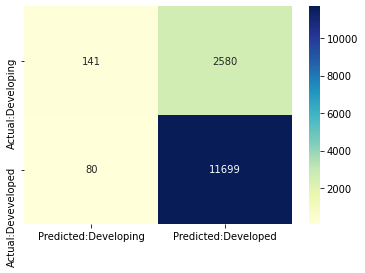

In [ ]:
# direct sampling
# create confusion matrix and heat map
development_y_pred = development_direct_clf.predict(development_x_test)
development_confusion_matrix = multilabel_confusion_matrix(y_true=development_y_test, y_pred=development_y_pred, labels=[1])
# create heat map
development_matrix = pd.DataFrame(data=development_confusion_matrix[0],
                           columns=['Predicted:Developing','Predicted:Developed'],index=['Actual:Developing','Actual:Deveveloped'])
sns.heatmap(development_matrix, annot=True,fmt='d',cmap="YlGnBu")
# print precision, recall, and F1 score
print('Precision: %.3f' %precision_score(y_true=development_y_test, y_pred=development_y_pred, labels=[1,2],average='micro'))
print('Recall: %.3f' %recall_score(y_true=development_y_test, y_pred=development_y_pred, labels=[1,2],average='micro'))
print('F1: %.3f' %f1_score(y_true=development_y_test, y_pred=development_y_pred, labels=[1,2],average='micro'))

Precision: 0.866
Recall: 0.817
F1: 0.841


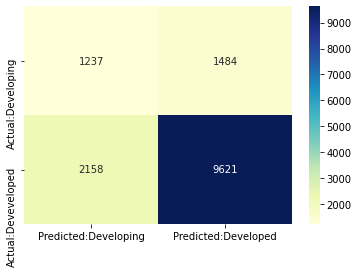

In [ ]:
# over sampling
# create confusion matrix and heat map
development_y_pred_over = development_over_clf.predict(development_x_test)
development_confusion_matrix_over = multilabel_confusion_matrix(y_true=development_y_test, y_pred=development_y_pred_over, labels=[1])
# create heat map
development_matrix_over = pd.DataFrame(data=development_confusion_matrix_over[0],
                           columns=['Predicted:Developing','Predicted:Developed'],index=['Actual:Developing','Actual:Deveveloped'])
sns.heatmap(development_matrix_over, annot=True,fmt='d',cmap="YlGnBu")
# print precision, recall, and F1 score
print('Precision: %.3f' %precision_score(y_true=development_y_test, y_pred=development_y_pred_over, labels=[1,2],average='micro'))
print('Recall: %.3f' %recall_score(y_true=development_y_test, y_pred=development_y_pred_over, labels=[1,2],average='micro'))
print('F1: %.3f' %f1_score(y_true=development_y_test, y_pred=development_y_pred_over, labels=[1,2],average='micro'))

# Conclusion 

We saw that we weren't able to get great predictions for age with linear regression. Running with PCA did not improve our model, suggesting that there aren't clear groupings of any of the 16 factors we used as our features; in fact, reducing the number of dimensions with PCA actually came at the expense of a bit of accuracy. Moreover, regularization also did not improve the model, telling us that overfitting is not what's contributing to a low prediction score.

Overall, this suggests that generally, personality types don't correlate much with age. While it's possible that there are more people with certain individual traits (eg. "Self reliance") at certain ages, there doesn't seem to be much age-dependence on entire personalities, made up of combinations of traits. 


On the other hand, we were able to reach a significantly higher accuracy score at 79.4% in predicting a respondent's gender with the logistic regression model. We can tentatively conclude that there is some linear relationship between personalities and gender; in other words, there are certain combinations of traits that are more indicative of a respondent being male versus female. On a similar note, we reached an accuracy score of 80.4% when predicting development level with the logistic model, suggesting that development level and personalities are correlated. However, in our exploratory data analysis, we found that 82.5% of test takers are located in developed regions, indicating that our model could be biased due to the unevenly distributed sample size and further showing that our model may not be as accurate as the numbers say but rather a result of the bias present. 


In our Random Forest model, for regions, we got an accuracy of 57.85%. While the oversampling technique yielded lower accuracy scores than the direct sampling, this does not necessarily mean it is worst than the direct sampling classifier. Overall, should a more geographically balanced dataset be utilized, the oversampling classifier will probably be more successful, since a geographically-balanced dataset will not have as much values from the Americas.  For development level, accuracy score was at 81% and followed similar patterns to the region classifiers.  That is, the direct sampling had a higher accuracy and larger false positive rates for the dominant class (developed) while the oversampling had a higher false negative rate.    Notably, the development classifier appears to have far greater accuracy, precision, recall, and F1 scores than the region classifiers, suggesting that though it may be difficult to extract an individual’s region of origin based of their test data, it is possible to extract the development of their country of region.  This is expected, as countries grouped by development levels share more in common that countries grouped by geographical regions. 




##Challenges and Limitations

A challenge we initially faced was in interpreting and extracting the features of our data. We needed the actual results of the test for each respondent, but we weren’t sure what exactly Cattell’s scoring procedure was. Thus, we ultimately went with an intuitive calculation of the scores for each trait, which resulted in scores that don’t exactly represent that of Cattell’s. 

Another challenge involved dealing with the uneven distribution of our data. As we saw in our exploratory data analysis, we had a disproportionate amount of respondents from the Americas and that were younger than 35. Additionally, grouping by regions may not be a very good grouping, as the category may be a bit broad.  For example, individuals from Canada and Brazil or Japan and Iran, yet are grouped into the same regions (Americas and Asia).  As such, it may be better to group by subregions (e.g.: North America, South America, Middle East, East Asia), but examination of the distribution by sub-regions in the exploratory data analysis showed that grouping by subregions would infeasible, as such grouping would only further exacerbate imbalance among classes.  For example, of the 22 classes 5 classes have less than 10 values, and another 5 classes account for nearly 93% of all values.


Lastly, we struggled with finding the best visualizations for our analysis and model evaluations. We ended up experimenting with many different types of plots and visualizations, exploring the Seaborn library, and we learned a lot about how to properly interpret these plots to identify areas that can be improved in our models.



##Next Steps

Potential next steps include:
- Running a Random Forest Classifier for age categories rather than continuous ages
- Examine whether certain traits (rather combinations of traits) correlate with age. For example, how do predictions for age based on just “emotional stability” compare to predictions based on just “warmth”? 
- Based on our learning curves, we can try running logistic regression with train sample sizes of 12000 in predicting gender and 21000 for predicting development level
- Obtaining more data from respondents in other regions of the world to balance dataset than re-running random forest classifiers
- Creating ensembles of classifiers in the hopes of obtaining a greater variety of samples from multiple countries
